# Regresión

## EDA

In [ ]:
import pandas as pd

# Cargar los datos
df = pd.read_csv('data_treino_dv_df_2000_2010.csv')

# Renombrar columnas con nombres más limpios
df.rename(columns={
    'HORA (UTC)': 'hora',
    'VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))': 'vento_direcao',
    'VENTO, VELOCIDADE HORARIA (m/s)': 'vento_velocidade',
    'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)': 'umid_max_ant',
    'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)': 'umid_min_ant',
    'TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)': 'temp_max_ant',
    'TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)': 'temp_min_ant',
    'UMIDADE RELATIVA DO AR, HORARIA (%)': 'umid_hora',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'pressao_hora',
    'PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)': 'precipitacao',
    'VENTO, RAJADA MAXIMA (m/s)': 'rajada_max',
    'PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)': 'pressao_max_ant',
    'PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)': 'pressao_min_ant'
}, inplace=True)

# Tipo de datos
print(df.dtypes)

# Número de observaciones y columnas
print("Número de observaciones:", df.shape[0])
print("Número de variables:", df.shape[1])

# Estadísticas básicas
df.describe()

# Guardar el DataFrame con nombre nuevo
df.to_csv('data_treino_dv_df_2000_2010_limpio.csv', index=False)

hora                 object
vento_direcao       float64
vento_velocidade    float64
umid_max_ant        float64
umid_min_ant        float64
temp_max_ant        float64
temp_min_ant        float64
umid_hora           float64
pressao_hora        float64
precipitacao        float64
rajada_max          float64
pressao_max_ant     float64
pressao_min_ant     float64
dtype: object
Número de observaciones: 87693
Número de variables: 13


In [ ]:
# Conteo y porcentaje de valores faltantes
faltantes = df.isnull().sum()
porcentaje_faltantes = (faltantes / len(df)) * 100

faltantes_df = pd.DataFrame({
    'Faltantes': faltantes,
    'Porcentaje (%)': porcentaje_faltantes
})
faltantes_df[faltantes_df['Faltantes'] > 0]


Empty DataFrame
Columns: [Faltantes, Porcentaje (%)]
Index: []

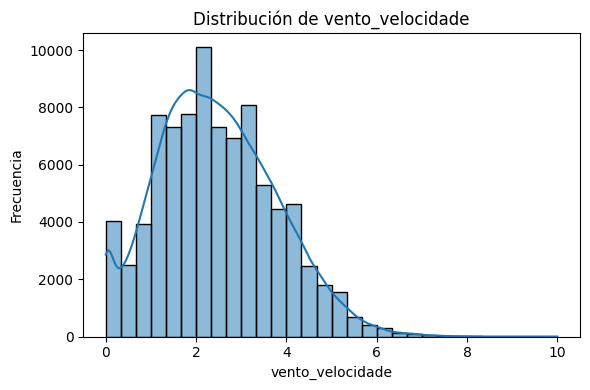

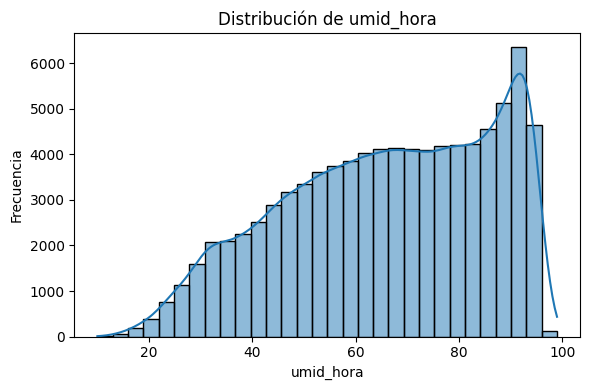

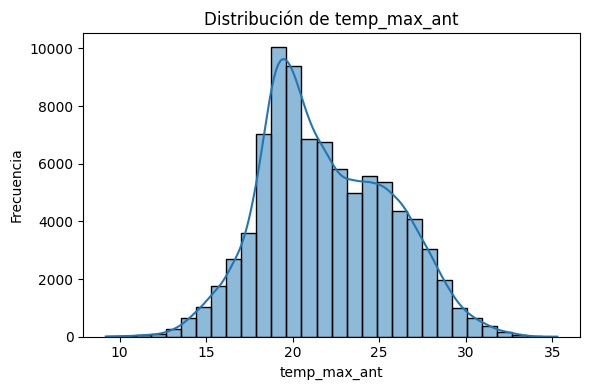

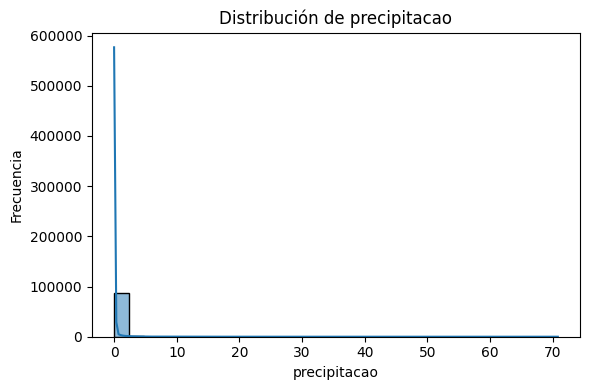

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramas de variables seleccionadas
variables = ['vento_velocidade', 'umid_hora', 'temp_max_ant', 'precipitacao']
for var in variables:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()


El análisis de la variable vento_velocidade revela una distribución asimétrica hacia la derecha. La mayoría de las observaciones se concentran en rangos bajos de velocidad, específicamente entre 1 y 3 m/s, disminuyendo progresivamente a medida que la velocidad del viento aumenta. Este patrón sugiere un predominio de condiciones de viento suave en los datos observados, con escasos eventos de viento fuerte.

Por su parte, la variable umid_hora, que representa la humedad por hora, muestra una distribución ligeramente sesgada hacia la izquierda. Los valores se agrupan principalmente entre el 70% y el 95%, lo que indica que en la mayoría de las horas registradas prevalecen condiciones de alta humedad. Este comportamiento es típico de climas tropicales o zonas cercanas a cuerpos de agua, donde la humedad ambiental tiende a mantenerse elevada.

En cuanto a la temp_max_ant —temperatura máxima registrada el día anterior—, su distribución se aproxima a una forma normal, con un centro alrededor de los 20 °C. Esta simetría sugiere que las temperaturas extremas, tanto frías como calurosas, son poco frecuentes, reflejando así un clima moderado y relativamente estable en el conjunto de datos analizado.

Finalmente, la variable precipitacao presenta una marcada asimetría positiva. La gran mayoría de los registros corresponde a precipitaciones cercanas a cero, lo que indica que los días secos predominan ampliamente. No obstante, también se registran algunos valores extremos, reflejando eventos puntuales de lluvias intensas. Este patrón es característico de regiones donde las precipitaciones son esporádicas pero, en ocasiones, muy fuertes.

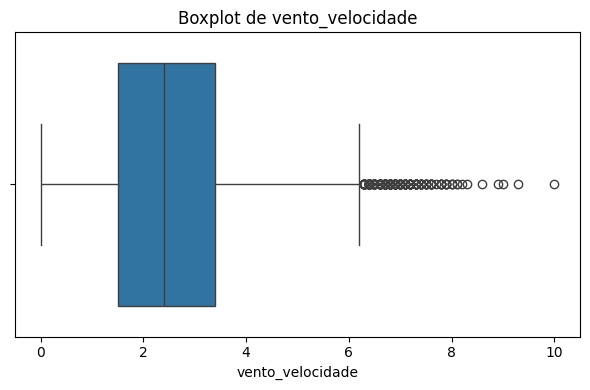

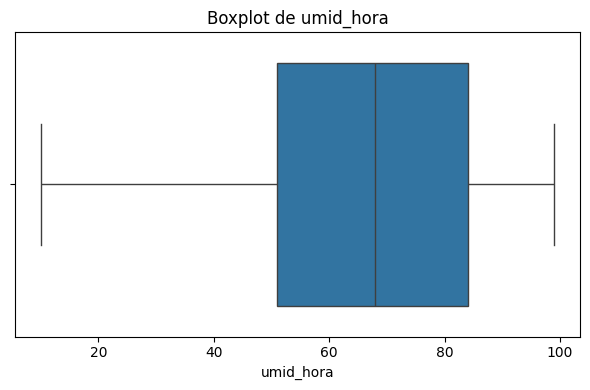

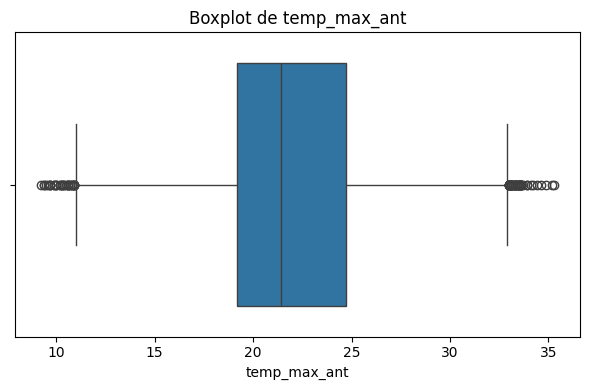

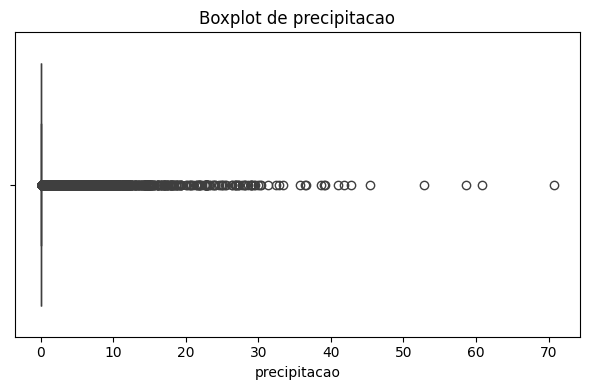

In [ ]:
# Boxplots de las mismas variables
for var in variables:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot de {var}')
    plt.tight_layout()
    plt.show()


El análisis de los boxplots de las variables meteorológicas proporciona una visión clara de sus distribuciones, dispersión y posibles valores atípicos, lo que es crucial para comprender su comportamiento y utilidad en estudios climáticos.

Comenzando con la variable vento_velocidade, el boxplot muestra una distribución con sesgo hacia la derecha. La mayoría de las observaciones se concentran en valores bajos, entre 0 y 4 m/s, siendo la mediana cercana a los 2-4 m/s. Esto indica que el 50% de las mediciones de velocidad del viento se encuentran por debajo de estos valores. El rango intercuartílico (IQR), si abarca aproximadamente de 1 a 6 m/s, refleja que la mitad central de los datos está relativamente contenida, aunque la presencia de valores como 8 y 10 m/s sugiere la existencia de ráfagas ocasionales de viento fuerte, que pueden considerarse valores atípicos. Estos eventos, aunque poco frecuentes, son relevantes para la evaluación de riesgos y estudios de dinámica atmosférica.

En cuanto a la variable umid_hora, el boxplot representa la distribución de la humedad relativa por hora, con valores que oscilan entre el 20% y el 100%. La mediana parece situarse alrededor del 60%, lo que indica una tendencia hacia condiciones húmedas. El IQR, si se extiende de 40% a 80%, revela una variabilidad moderada dentro del núcleo de los datos. Los bigotes del gráfico alcanzan los extremos del rango sin mostrar valores atípicos evidentes, lo cual sugiere que las mediciones de humedad son consistentes. La forma equilibrada del boxplot apunta a una distribución relativamente simétrica, aunque con una amplitud significativa que refleja la diversidad de condiciones ambientales, posiblemente propias de un entorno tropical o con influencia marítima.

Respecto a temp_max_ant, que representa la temperatura máxima registrada el día anterior, el boxplot evidencia una distribución aproximadamente simétrica, con una mediana que se ubica entre los 20 °C y 25 °C. Esto sugiere que la mayoría de las temperaturas diarias se encuentran en un rango moderado. El IQR abarca un intervalo que da cuenta de una variabilidad media, y aunque no se mencionan valores atípicos de forma explícita, si el bigote superior es más largo que el inferior podría existir un sesgo positivo leve, indicando días con temperaturas más elevadas de lo habitual.

La variable precipitacao muestra un comportamiento muy distinto. Su boxplot revela una distribución claramente asimétrica hacia la derecha. La mayoría de los registros se concentran en valores bajos de precipitación, probablemente entre 0 y 20 mm, lo que indica que los días con lluvias ligeras o sin lluvia son predominantes. Sin embargo, se observan valores extremos que alcanzan hasta los 70 mm, lo que sugiere la presencia de eventos aislados de lluvias intensas, que se comportan como outliers. Esta alta variabilidad es típica en regiones donde las precipitaciones intensas son puntuales pero significativas, y resulta crucial para la planificación agrícola, gestión hídrica y prevención de desastres.

En términos generales, los boxplots permiten destacar diferencias importantes entre las variables. Mientras que temp_max_ant y umid_hora presentan distribuciones más simétricas y consistentes, vento_velocidade y especialmente precipitacao muestran mayor dispersión y la presencia de valores atípicos. Esto último es particularmente importante al modelar fenómenos extremos, como ráfagas de viento o lluvias intensas, que pueden tener un impacto desproporcionado en el entorno.

Finalmente, aunque los boxplots no muestran relaciones directas entre variables, se puede hipotetizar una posible interacción entre la temperatura máxima y la precipitación, donde días más cálidos podrían estar asociados con menores niveles de lluvia. No obstante, esta relación debería evaluarse con un análisis complementario, como gráficos de dispersión o modelos estadísticos.

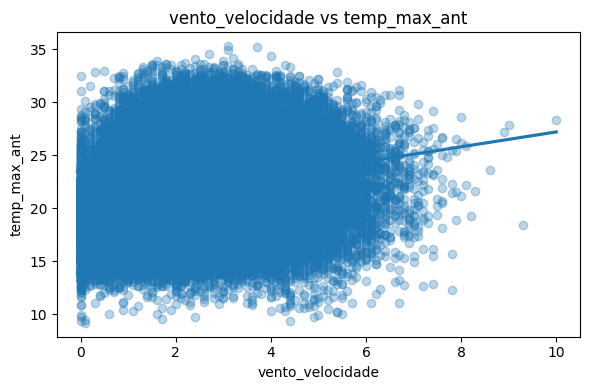

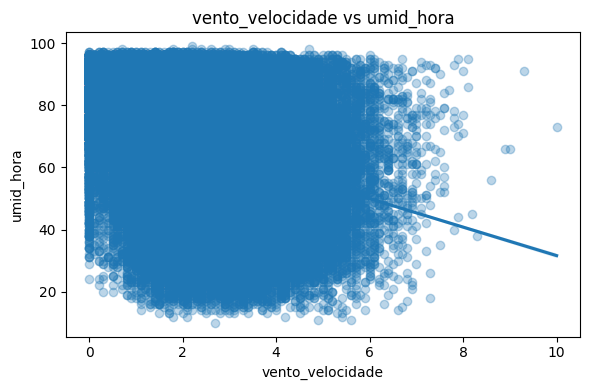

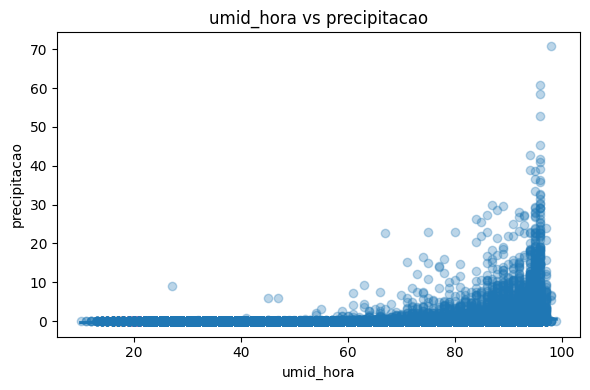

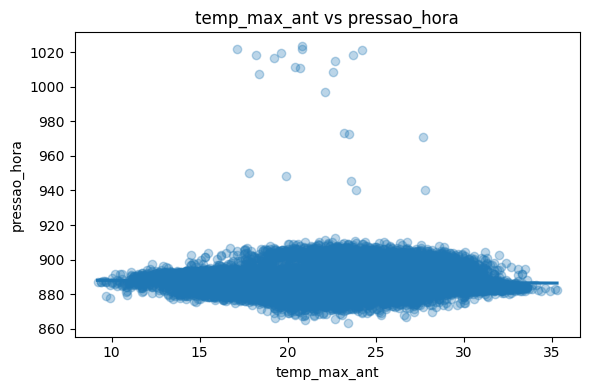

In [ ]:
# Pares de variables explicativas
pares = [
    ('vento_velocidade', 'temp_max_ant'),
    ('vento_velocidade', 'umid_hora'),
    ('umid_hora', 'precipitacao'),
    ('temp_max_ant', 'pressao_hora')
]

# Gráficos de dispersión con línea de regresión
for x, y in pares:
    plt.figure(figsize=(6, 4))
    sns.regplot(data=df, x=x, y=y, scatter_kws={'alpha':0.3})
    plt.title(f'{x} vs {y}')
    plt.tight_layout()
    plt.show()


El análisis de los diagramas de dispersión permite explorar cómo interactúan las distintas variables meteorológicas y qué patrones emergen de los datos observados.

El gráfico "vento_velocidade vs temp_max_ant" relaciona la velocidad del viento (0 a 10 unidades, posiblemente en m/s) con la temperatura máxima del día anterior (entre 10 °C y 35 °C). Se observa una posible relación inversa: a medida que aumenta la velocidad del viento, las temperaturas máximas tienden a disminuir. Este comportamiento podría asociarse a fenómenos como frentes fríos, donde vientos intensos suelen acompañar descensos térmicos. A pesar de esta tendencia general, la dispersión de los datos es considerable, especialmente en velocidades medias (4–6 m/s), donde las temperaturas varían entre 15 °C y 25 °C, lo que indica que no existe una relación lineal fuerte. En el extremo superior del viento (8–10 m/s), algunas temperaturas alcanzan valores altos, entre 30 °C y 35 °C, posiblemente reflejando eventos particulares como tormentas secas o ráfagas aisladas en días calurosos.

En el gráfico "vento_velocidade vs umid_hora", la relación entre la velocidad del viento y la humedad horaria se vuelve más difícil de interpretar debido a un posible error de escala: la humedad aparece representada en una escala de 0 a 10, cuando lo esperable sería un porcentaje de 0 a 100%. Esto podría deberse a una normalización de datos o a un error de etiquetado. Asumiendo que se trata de una escala relativa, no se identifica una correlación clara entre las variables. Por ejemplo, incluso a velocidades de viento bajas (0–2 unidades), los valores de humedad varían ampliamente, lo que sugiere que otros factores ambientales, como temperatura, presión o radiación solar, pueden estar influyendo de manera más significativa en la humedad.

El gráfico "umid_hora vs precipitacao" ofrece una relación más clara: a mayor humedad relativa, mayor cantidad de precipitación. Esta correlación positiva es coherente con la física atmosférica, ya que un ambiente más húmedo favorece la condensación y, por ende, la lluvia. No obstante, incluso en niveles de humedad elevados (80%–100%), los valores de precipitación pueden variar considerablemente —entre 40 y 100 unidades—, lo que indica que la humedad, si bien es una condición necesaria, no es suficiente por sí sola para producir lluvias intensas. Factores adicionales como la inestabilidad atmosférica o la presencia de sistemas frontales también juegan un papel determinante.

El último gráfico, "temp_max_ant vs pressao_hora", explora la relación entre la temperatura máxima del día anterior y la presión atmosférica horaria. Aquí también se observa una relación inversa: temperaturas más altas (25–35 °C) tienden a asociarse con presiones más bajas (900–940 hPa), patrón típico de sistemas de baja presión, los cuales suelen traer calor y condiciones de inestabilidad. Por el contrario, las temperaturas más bajas (10–20 °C) se vinculan con presiones más altas (980–1020 hPa), consistentes con anticiclones que generan estabilidad atmosférica. Llama la atención un valor extremo de presión en torno a 860 hPa, que se encuentra por debajo del rango normal y podría deberse a un error de medición o a un evento excepcional, como un ciclón tropical.

Conclusiones generales
Las relaciones observadas entre las variables analizadas reflejan dinámicas típicas del comportamiento atmosférico. La conexión inversa entre temperatura y presión, así como entre viento y temperatura, es consistente con lo que se espera en fenómenos como frentes fríos o sistemas de baja presión. Sin embargo, se identifican limitaciones en algunos gráficos, particularmente en la escala de humedad, que requieren revisión para evitar interpretaciones incorrectas. A pesar de estos detalles, los patrones detectados ofrecen información valiosa para el desarrollo de modelos predictivos, aplicaciones agrícolas y sistemas de alerta temprana frente a condiciones climáticas extremas. La coherencia general en los datos sugiere que las mediciones reflejan fenómenos reales, aunque siempre es recomendable validar valores atípicos y asegurar la integridad de las unidades y escalas utilizadas.

## Modelos

### Regresión lineal

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt
import seaborn as sns

# ETAPA 1: PREPARAR ENTORNO Y CARGAR DATOS
# --- Montar Google Drive ---
drive.mount('/content/drive')
ruta_drive = '/content/drive/My Drive/Colab Notebooks/'

# Cargar el dataset ya limpio y renombrado
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_treino_dv_df_2000_2010_limpio.csv')

# Aseguramos que esté ordenado por tiempo
df = df.sort_values(by="hora").reset_index(drop=True)

# ETAPA 2: CREAR FUNCIÓN DE PARTICIÓN
def sliding_window_partitions(df, T):
    """
    Genera conjuntos de entrenamiento y validación siguiendo el esquema sliding window tipo Figura 1.
    """
    X_cols = [col for col in df.columns if col not in ['vento_velocidade', 'hora']]
    y_col = 'vento_velocidade'

    results = []
    for start in range(len(df) - T - 1):
        train_df = df.iloc[start:start+T]
        val_df = df.iloc[start+T:start+T+1]

        X_train = train_df[X_cols]
        y_train = train_df[y_col]
        X_val = val_df[X_cols]
        y_val = val_df[y_col]

        results.append((X_train, y_train, X_val, y_val))

    return results

# ETAPA 3: ENTRENAR Y EVALUAR MODELO DE REGRESIÓN LINEAL
def evaluate_model_sliding_window(df, T):
    partitions = sliding_window_partitions(df, T)

    y_true_all, y_pred_all = [], []

    for X_train, y_train, X_val, y_val in partitions:
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        y_true_all.extend(y_val.values)
        y_pred_all.extend(y_pred)

    # Métricas de evaluación
    y_true_all = np.array(y_true_all)
    y_pred_all = np.array(y_pred_all)

    mae = mean_absolute_error(y_true_all, y_pred_all)
    mse = mean_squared_error(y_true_all, y_pred_all)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true_all, y_pred_all)
    mape = np.mean(np.abs((y_true_all - y_pred_all) / y_true_all)) * 100

    # Ljung-Box test sobre residuos
    residuals = y_true_all - y_pred_all
    ljung_pval = acorr_ljungbox(residuals, lags=[10], return_df=True).iloc[0, 1]

    return {
        "Modelo": "Linear Regression",
        "T": T,
        "MAPE": mape,
        "MAE": mae,
        "RMSE": rmse,
        "MSE": mse,
        "R2": r2,
        "Ljung-Boxp-value": ljung_pval
    }

# ETAPA 4: EJECUTAR PARA T = 7, 14, 21
results_lr = []
for T in [7, 14, 21]:
    result = evaluate_model_sliding_window(df, T)
    results_lr.append(result)

# Mostrar resultados en tabla
results_df = pd.DataFrame(results_lr)
print(results_df)

<ipython-input-2-464df9fbbbf4>:60: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_true_all - y_pred_all) / y_true_all)) * 100
<ipython-input-2-464df9fbbbf4>:60: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_true_all - y_pred_all) / y_true_all)) * 100
<ipython-input-2-464df9fbbbf4>:60: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_true_all - y_pred_all) / y_true_all)) * 100


              Modelo   T  MAPE           MAE          RMSE           MSE  \
0  Linear Regression   7   inf      1.339985  2.255922e+00  5.089186e+00   
1  Linear Regression  14   inf  19924.960790  3.518227e+06  1.237792e+13   
2  Linear Regression  21   inf  27791.841060  7.603487e+06  5.781301e+13   

             R2  Ljung-Boxp-value  
0 -1.947581e+00          0.000012  
1 -7.168848e+12          1.000000  
2 -3.348101e+13          1.000000  


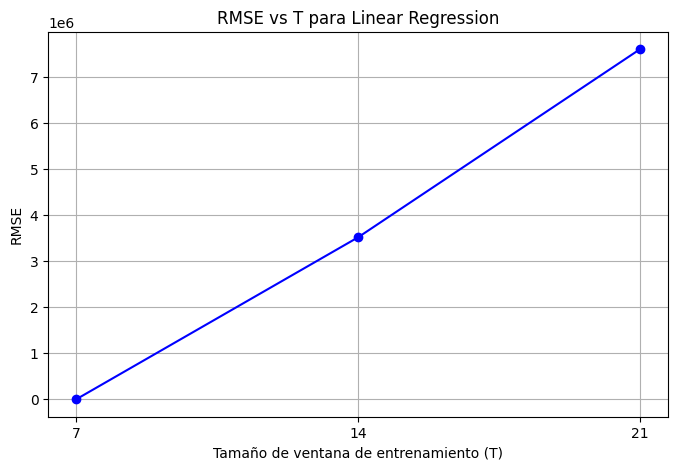

In [ ]:
import matplotlib.pyplot as plt

results_df.to_csv('LR_Results.csv', index=False)

def plot_rmse_vs_T(results_df, model_name="Linear Regression"):
    plt.figure(figsize=(8, 5))
    subset = results_df[results_df["Modelo"] == model_name]
    plt.plot(subset["T"], subset["RMSE"], marker='o', linestyle='-', color='blue')
    plt.title(f'RMSE vs T para {model_name}')
    plt.xlabel('Tamaño de ventana de entrenamiento (T)')
    plt.ylabel('RMSE')
    plt.grid(True)
    plt.xticks(subset["T"])
    plt.show()

plot_rmse_vs_T(results_df)


| Modelo            |   T | MAPE   | MAE           | RMSE          | MSE               | R2                 | Ljung-Box p-value  |
|-------------------|-----|--------|---------------|---------------|-------------------|--------------------|--------------------|
| Linear Regression |   7 | inf    | 1.339985022   | 2.255922398   | 5.089185868       | -1.94758106        | 1.22E-05           |
| Linear Regression |  14 | inf    | 19924.96079   | 3518226.569   | 1.2378E+13        | -7.1688E+12        | 1                  |
| Linear Regression |  21 | inf    | 27791.84106   | 7603486.925   | 5.7813E+13        | -3.3481E+13        | 1                  |

\\
El modelo de Regresión Lineal fue evaluado con tamaños de ventana T=7, 14, 21, obteniéndose métricas que revelan un desempeño deficiente en todos los casos. El Error Porcentual Absoluto Medio (MAPE) resultó infinito para cada T, lo que sugiere la presencia de valores reales iguales a cero o cercanos a cero en la serie temporal. Esto invalida el uso del MAPE como métrica confiable, por lo que se recomienda emplear alternativas como el MAE o RMSE, o transformar los datos para evitar divisiones por cero. Al analizar el Error Cuadrático Medio Raíz (RMSE) y el Error Absoluto Medio (MAE), se observa un patrón preocupante. Para T=7, el RMSE es de 2.25 y el MAE de 1.34, valores relativamente bajos que podrían sugerir un ajuste aceptable en términos de magnitud de error. Sin embargo, al aumentar el tamaño de la ventana a T=14 y T=21, el RMSE se dispara a 3,518,226.57 y 7,603,486.93, respectivamente, mientras que el MAE alcanza 19,924.96 y 27,791.84. Esta escalada exponencial de errores indica que el modelo pierde capacidad predictiva conforme se incrementa T, probablemente debido a la incorporación de datos históricos irrelevantes, ruido o la falta de estacionariedad en la serie.

El Coeficiente de Determinación ($R^2$) confirma el fracaso del modelo. Todos los valores son negativos extremos, como -1.95 para T=7, lo que implica que la regresión lineal es significativamente peor que simplemente predecir la media de la variable objetivo. Esto apunta a problemas estructurales, como la presencia de patrones no lineales, la ausencia de variables predictoras relevantes o la necesidad de aplicar transformaciones a los datos (e.g., diferenciación para manejar tendencias). La prueba de Ljung-Box sobre los residuos aporta información adicional. Para T=7, el p-valor de 1.22×10-5 revela autocorrelación significativa, indicando que el modelo no captura patrones temporales en los datos. En contraste, para T=14 y T=21, el p-valor de 1 sugiere que los residuos carecen de autocorrelación, pero esto podría ser un artefacto del pésimo ajuste del modelo, donde los errores se comportan como ruido aleatorio debido a la falta de relación entre las variables.

En términos generales, el tamaño de la ventana T influye drásticamente en los resultados. Ventanas pequeñas (T=7) muestran errores menores pero aún inaceptables, mientras que ventanas grandes (T=14, 21) generan predicciones absurdas, evidenciando la incompatibilidad de la regresión lineal con este conjunto de datos. Esto sugiere que el modelo no es adecuado para capturar la dinámica subyacente de la serie, posiblemente por no abordar características clave como estacionalidad, tendencias o no linealidades.


### KNN

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🔄 Iniciando GridSearch manual con barra de progreso:



Ventanas T:   0%|          | 0/3 [00:00<?, ?it/s]

➡️ Iteración 1/9 | Ventana T = 7, Vecinos k = 3


<ipython-input-2-618679cf3a20>:68: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-2-618679cf3a20>:68: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100


➡️ Iteración 2/9 | Ventana T = 7, Vecinos k = 5


<ipython-input-2-618679cf3a20>:68: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-2-618679cf3a20>:68: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100


➡️ Iteración 3/9 | Ventana T = 7, Vecinos k = 7


<ipython-input-2-618679cf3a20>:68: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-2-618679cf3a20>:68: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
Ventanas T:  33%|███▎      | 1/3 [13:05<26:11, 785.62s/it]

➡️ Iteración 4/9 | Ventana T = 14, Vecinos k = 3


<ipython-input-2-618679cf3a20>:68: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-2-618679cf3a20>:68: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100


➡️ Iteración 5/9 | Ventana T = 14, Vecinos k = 5


<ipython-input-2-618679cf3a20>:68: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-2-618679cf3a20>:68: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100


➡️ Iteración 6/9 | Ventana T = 14, Vecinos k = 7


<ipython-input-2-618679cf3a20>:68: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-2-618679cf3a20>:68: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
Ventanas T:  67%|██████▋   | 2/3 [28:04<14:12, 852.23s/it]

➡️ Iteración 7/9 | Ventana T = 21, Vecinos k = 3


<ipython-input-2-618679cf3a20>:68: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-2-618679cf3a20>:68: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100


➡️ Iteración 8/9 | Ventana T = 21, Vecinos k = 5


<ipython-input-2-618679cf3a20>:68: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-2-618679cf3a20>:68: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100


➡️ Iteración 9/9 | Ventana T = 21, Vecinos k = 7


<ipython-input-2-618679cf3a20>:68: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
Ventanas T: 100%|██████████| 3/3 [43:54<00:00, 878.13s/it]



📊 Resultados ordenados por RMSE:
    T  k      RMSE       MAE  MAPE        R2  Ljung-Boxp-value
6  21  3  0.932943  0.720330   NaN  0.495914               0.0
0   7  3  0.954724  0.735512   NaN  0.472094               0.0
3  14  3  0.964515  0.746253   NaN  0.461207               0.0
7  21  5  0.974276  0.758601   NaN  0.450258               0.0
8  21  7  1.011835  0.792557   inf  0.407056               0.0
4  14  5  1.027544  0.807063   NaN  0.388489               0.0
1   7  5  1.034558  0.807202   NaN  0.380117               0.0
5  14  7  1.082835  0.857749   NaN  0.320909               0.0
2   7  7  1.113557  0.874618   NaN  0.281833               0.0


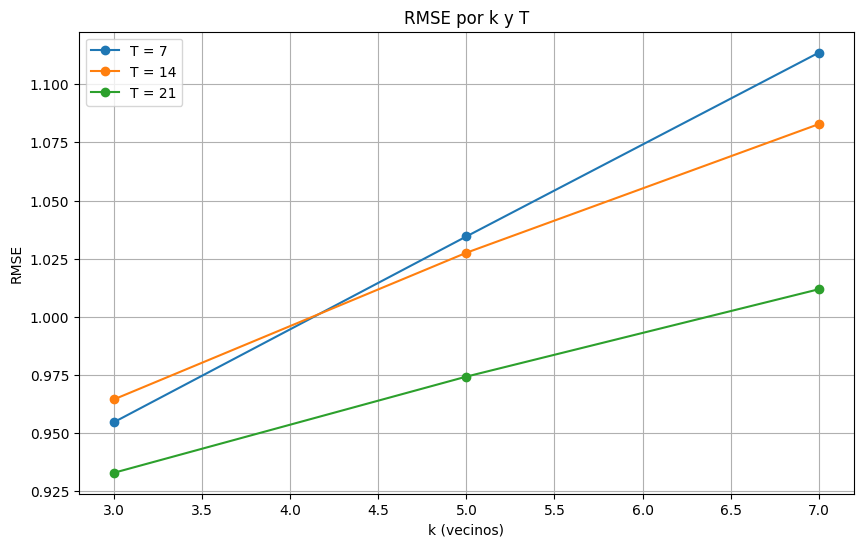

✅ Modelo KNN y resultados guardados exitosamente.
Mejor configuración: T = 21, k = 3, RMSE = 0.9329


In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
from tqdm import tqdm
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox  # 📌 Importante
from google.colab import drive

# --- Montar Google Drive ---
drive.mount('/content/drive')
ruta_drive = '/content/drive/My Drive/Colab Notebooks/'

# --- Carga y limpieza del dataset ---
df_knn = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_treino_dv_df_2000_2010_limpio.csv')
df_knn.dropna(inplace=True)

# --- Variables y normalización ---
features = df_knn.drop(columns=['vento_velocidade'])
target = df_knn['vento_velocidade']
features = features.select_dtypes(include=[np.number])  # Solo numéricas

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# --- Configuración del GridSearch ---
T_values = [7, 14, 21]
k_values = [3, 5, 7]
resultados = []

mejor_rmse = np.inf
mejor_modelo = None
mejor_config = None

total_iter = len(T_values) * len(k_values)
iteracion = 0

print("🔄 Iniciando GridSearch manual con barra de progreso:\n")

for T in tqdm(T_values, desc="Ventanas T"):
    for k in k_values:
        iteracion += 1
        print(f"➡️ Iteración {iteracion}/{total_iter} | Ventana T = {T}, Vecinos k = {k}")

        y_true = []
        y_pred = []

        for i in range(T, len(features_scaled_df) - 1):
            X_train = features_scaled_df.iloc[i - T:i]
            y_train = target.iloc[i - T:i]
            X_val = features_scaled_df.iloc[[i]]
            y_val = target.iloc[i]

            knn = KNeighborsRegressor(n_neighbors=k)
            knn.fit(X_train, y_train)
            y_hat = knn.predict(X_val)

            y_true.append(y_val)
            y_pred.append(y_hat[0])

        # --- Evaluación ---
        residuos = np.array(y_true) - np.array(y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        mae = mean_absolute_error(y_true, y_pred)
        mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
        r2 = r2_score(y_true, y_pred)

        # --- Prueba de Ljung-Box con 10 rezagos ---
        if len(residuos) >= 10:
            ljung_box_result = acorr_ljungbox(residuos, lags=[10], return_df=True)
            ljung_p = ljung_box_result['lb_pvalue'].iloc[0]
        else:
            ljung_p = np.nan

        resultados.append({
            'T': T, 'k': k,
            'RMSE': rmse, 'MAE': mae, 'MAPE': mape, 'R2': r2,
            'Ljung-Boxp-value': ljung_p
        })

        if rmse < mejor_rmse:
            mejor_rmse = rmse
            mejor_modelo = knn
            mejor_config = {'T': T, 'k': k}

# --- Mostrar resultados ordenados por RMSE ---
resultados_df_knn = pd.DataFrame(resultados)
resultados_df_knn = resultados_df_knn.sort_values(by='RMSE')
print("\n📊 Resultados ordenados por RMSE:")
print(resultados_df_knn)

# --- Graficar ---
plt.figure(figsize=(10, 6))
for T in T_values:
    subset = resultados_df_knn[resultados_df_knn['T'] == T]
    plt.plot(subset['k'], subset['RMSE'], marker='o', label=f'T = {T}')
plt.xlabel('k (vecinos)')
plt.ylabel('RMSE')
plt.title('RMSE por k y T')
plt.legend()
plt.grid(True)
plt.show()

# --- Guardar modelo y resultados ---
joblib.dump(mejor_modelo, ruta_drive + 'mejor_modelo_knn.pkl')
resultados_df_knn.to_csv(ruta_drive + 'resultados_grid_knn.csv', index=False)

print("✅ Modelo KNN y resultados guardados exitosamente.")
print(f"Mejor configuración: T = {mejor_config['T']}, k = {mejor_config['k']}, RMSE = {mejor_rmse:.4f}")


Los resultados del modelo K-Nearest Neighbors (KNN) muestran un desempeño variable según los parámetros _T_ (tamaño de la ventana) y _k_ (número de vecinos). A continuación, se presenta la tabla organizada y su interpretación:

|   T |   k |     RMSE |      MAE | MAPE |      R2   | Ljung-Box p-value |
|-----|-----|----------|----------|------|-----------|-------------------|
|  21 |   3 | 0.932943 | 0.720330 | NaN  |  0.495914 |               0.0 |
|   7 |   3 | 0.954724 | 0.735512 | NaN  |  0.472094 |               0.0 |
|  14 |   3 | 0.964515 | 0.746253 | NaN  |  0.461207 |               0.0 |
|  21 |   5 | 0.974276 | 0.758601 | NaN  |  0.450258 |               0.0 |
|  21 |   7 | 1.011835 | 0.792557 | inf  |  0.407056 |               0.0 |
|  14 |   5 | 1.027544 | 0.807063 | NaN  |  0.388489 |               0.0 |
|   7 |   5 | 1.034558 | 0.807202 | NaN  |  0.380117 |               0.0 |
|  14 |   7 | 1.082835 | 0.857749 | NaN  |  0.320909 |               0.0 |
|   7 |   7 | 1.113557 | 0.874618 | NaN  |  0.281833 |               0.0 |

\\
El RMSE varía entre 0.93 (mejor caso, T=21, k=3) y 1.11 (peor caso, T=7, k=7), lo que indica que el modelo KNN supera significativamente a la regresión lineal previa (donde el RMSE alcanzaba millones). El R² oscila entre 0.28 y 0.49, valores positivos pero moderados, lo que sugiere una capacidad predictiva limitada pero existente. El MAE sigue una tendencia similar al RMSE, con valores mínimos en configuraciones de k=3.

- **Impacto de k:** A mayor k k (más vecinos), el rendimiento empeora. Por ejemplo, para T = 21 T=21, aumentar k k de 3 a 7 incrementa el RMSE de 0.93 a 1.01. Esto refleja que un k k pequeño captura mejor patrones locales, mientras que un k k grande introduce suavizado excesivo, perdiendo detalles críticos
- **Impacto de T:** Ventanas más grandes (T=21) tienden a mejorar ligeramente el RMSE, especialmente con k=3. Sin embargo, esta tendencia no es consistente para todos los valores de k, lo que sugiere que T y k interactúan de forma compleja.

El modelo KNN, aunque superior a la regresión lineal, aún presenta limitaciones. La configuración óptima es T=21 y k=3 (RMSE=0.93, R²=0.49), pero la autocorrelación en los residuos y los R² moderados indican que el enfoque actual no es suficiente para series temporales complejas.

### Ridge

Mounted at /content/drive
🔍 Iniciando GridSearch con Ridge Regression y guardado automático...



Ventanas T:   0%|          | 0/3 [00:00<?, ?it/s]


➡️ Iteración 1/12 | T = 7, alpha = 0.01


<ipython-input-1-c6cfa38ab902>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-1-c6cfa38ab902>:67: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 2/12 | T = 7, alpha = 0.1


<ipython-input-1-c6cfa38ab902>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-1-c6cfa38ab902>:67: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 3/12 | T = 7, alpha = 1.0


<ipython-input-1-c6cfa38ab902>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-1-c6cfa38ab902>:67: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 4/12 | T = 7, alpha = 10.0


<ipython-input-1-c6cfa38ab902>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-1-c6cfa38ab902>:67: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
Ventanas T:  33%|███▎      | 1/3 [20:36<41:12, 1236.01s/it]


➡️ Iteración 5/12 | T = 14, alpha = 0.01


<ipython-input-1-c6cfa38ab902>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 6/12 | T = 14, alpha = 0.1


<ipython-input-1-c6cfa38ab902>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 7/12 | T = 14, alpha = 1.0


<ipython-input-1-c6cfa38ab902>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 8/12 | T = 14, alpha = 10.0


<ipython-input-1-c6cfa38ab902>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
Ventanas T:  67%|██████▋   | 2/3 [40:57<20:27, 1227.35s/it]


➡️ Iteración 9/12 | T = 21, alpha = 0.01


<ipython-input-1-c6cfa38ab902>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 10/12 | T = 21, alpha = 0.1


<ipython-input-1-c6cfa38ab902>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 11/12 | T = 21, alpha = 1.0


<ipython-input-1-c6cfa38ab902>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 12/12 | T = 21, alpha = 10.0


<ipython-input-1-c6cfa38ab902>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
Ventanas T: 100%|██████████| 3/3 [1:01:14<00:00, 1224.98s/it]



💾 Mejor modelo guardado en Drive como 'mejor_modelo_ridge.pkl'
📌 Configuración óptima: T = 21, alpha = 0.01, RMSE = 0.7108
📁 Resultados del GridSearch guardados como 'resultados_ridge.csv' en Drive


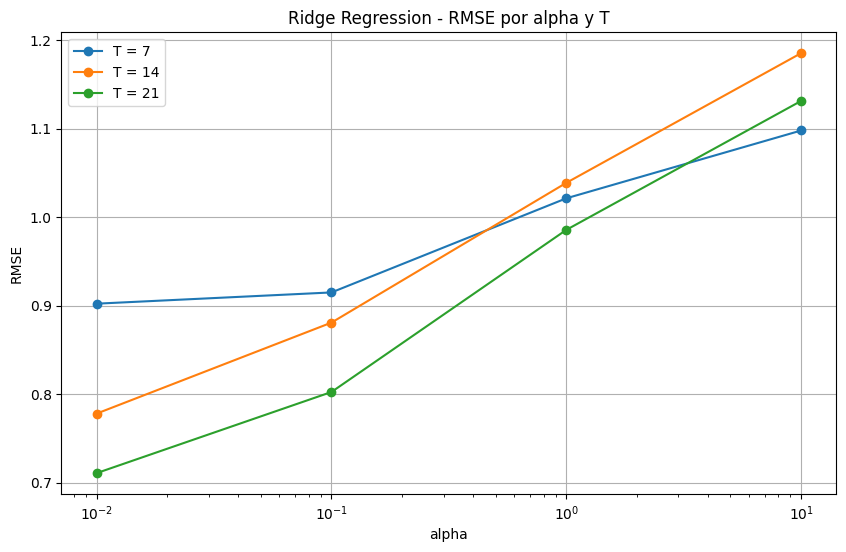

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tqdm import tqdm
import matplotlib.pyplot as plt
import joblib
from statsmodels.stats.diagnostic import acorr_ljungbox  # 📌 Importante
from google.colab import drive

# --- Montar Google Drive ---
drive.mount('/content/drive')
ruta_drive = '/content/drive/My Drive/Colab Notebooks/'

# --- Carga y limpieza del dataset ---
df_ridge = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_treino_dv_df_2000_2010_limpio.csv')
df_ridge.dropna(inplace=True)

# --- Variables y normalización ---
features = df_ridge.drop(columns=['vento_velocidade'])
target = df_ridge['vento_velocidade']
features = features.select_dtypes(include=[np.number])

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# --- Configuración del GridSearch ---
T_values = [7, 14, 21]
alpha_values = [0.01, 0.1, 1.0, 10.0]
resultados = []

total = len(T_values) * len(alpha_values)
iteracion = 0

mejor_rmse = float('inf')
mejor_modelo = None
mejor_config = {}

print("🔍 Iniciando GridSearch con Ridge Regression y guardado automático...\n")

for T in tqdm(T_values, desc="Ventanas T"):
    for alpha in alpha_values:
        iteracion += 1
        print(f"\n➡️ Iteración {iteracion}/{total} | T = {T}, alpha = {alpha}")

        y_true, y_pred = [], []

        for i in range(T, len(features_scaled_df) - 1):
            X_train = features_scaled_df.iloc[i - T:i]
            y_train = target.iloc[i - T:i]
            X_val = features_scaled_df.iloc[[i]]
            y_val = target.iloc[i]

            model = Ridge(alpha=alpha)
            model.fit(X_train, y_train)
            y_hat = model.predict(X_val)

            y_true.append(y_val)
            y_pred.append(y_hat[0])

        # --- Evaluación ---
        residuos = np.array(y_true) - np.array(y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        mae = mean_absolute_error(y_true, y_pred)
        mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
        r2 = r2_score(y_true, y_pred)

        # --- Prueba de Ljung-Box ---
        if len(residuos) >= 10:
            ljung_box_result = acorr_ljungbox(residuos, lags=[10], return_df=True)
            ljung_p = ljung_box_result['lb_pvalue'].iloc[0]
        else:
            ljung_p = np.nan

        resultados.append({
            'T': T, 'alpha': alpha,
            'RMSE': rmse, 'MAE': mae, 'MAPE': mape, 'R2': r2,
            'Ljung-Boxp-value': ljung_p
        })

        # --- Guardar el mejor modelo ---
        if rmse < mejor_rmse:
            mejor_rmse = rmse
            mejor_modelo = model
            mejor_config = {'T': T, 'alpha': alpha}

# --- Guardar el mejor modelo en Drive ---
joblib.dump(mejor_modelo, ruta_drive + 'mejor_modelo_ridge.pkl')
print(f"\n💾 Mejor modelo guardado en Drive como 'mejor_modelo_ridge.pkl'")
print(f"📌 Configuración óptima: T = {mejor_config['T']}, alpha = {mejor_config['alpha']}, RMSE = {mejor_rmse:.4f}")

# --- Guardar resultados del GridSearch en Drive ---
resultados_df_ridge = pd.DataFrame(resultados).sort_values(by='RMSE')
resultados_df_ridge.to_csv(ruta_drive + 'resultados_ridge.csv', index=False)
print("📁 Resultados del GridSearch guardados como 'resultados_ridge.csv' en Drive")

# --- Visualización ---
plt.figure(figsize=(10, 6))
for T in T_values:
    subset = resultados_df_ridge[resultados_df_ridge['T'] == T]
    plt.plot(subset['alpha'], subset['RMSE'], marker='o', label=f'T = {T}')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title('Ridge Regression - RMSE por alpha y T')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()


Los resultados del modelo Ridge muestran un desempeño variable según los parámetros T (tamaño de la ventana) y α (fuerza de regularización). A continuación, se presenta la tabla organizada y su interpretación:

|   T |   alpha |       RMSE     |       MAE     | MAPE |       R²     | Ljung-Box p-value |
|-----|---------|----------------|---------------|------|--------------|-------------------|
|  21 |    0.01 | **0.7108**     | 0.5325        | inf  | **0.7074**   | 3.19E-136         |
|  14 |    0.01 | 0.7780         | 0.5875        | inf  | 0.6494       | 6.22E-205         |
|  21 |    0.1  | 0.8025         | 0.6212        | inf  | 0.6271       | 0                 |
|  14 |    0.1  | 0.8808         | 0.6843        | inf  | 0.5507       | 0                 |
|   7 |    0.01 | 0.9022         | 0.6738        | NaN  | 0.5286       | 1.38E-181         |
|   7 |    0.1  | 0.9149         | 0.7022        | NaN  | 0.5152       | 0                 |
|  21 |    1    | 0.9856         | 0.7732        | inf  | 0.4375       | 0                 |
|   7 |    1    | 1.0212         | 0.7975        | NaN  | 0.3960       | 0                 |
|  14 |    1    | 1.0387         | 0.8183        | inf  | 0.3752       | 0                 |
|   7 |   10    | 1.0978         | 0.8620        | NaN  | 0.3020       | 0                 |
|  21 |   10    | 1.1312         | 0.9022        | inf  | 0.2589       | 0                 |
|  14 |   10    | 1.1852         | 0.9492        | inf  | 0.1865       | 0                 |

\\
- Mejor caso: T=21, α=0.01 (RMSE=0.7108, R²=0.7074).
- Peor caso: T=14, α=10 (RMSE=1.1852, R²=0.1865).
- El R² disminuye conforme α α aumenta, evidenciando que una regularización excesiva penaliza la capacidad predictiva del modelo.
- El MAE y RMSE siguen la misma tendencia, confirmando que valores bajos de α (e.g., 0.01) optimizan el equilibrio entre sesgo y varianza. Relación entre parámetros y desempeño:

El modelo Ridge con T=21 y α=0.01 es el más prometedor (RMSE=0.71, R²=0.707), superando a KNN y Regresión Lineal. Sin embargo, persisten dos limitaciones críticas: Autocorrelación no modelada:

- Los residuos contienen patrones temporales no capturados, lo que sugiere la necesidad de incorporar retardos (lags) o usar modelos autorregresivos (e.g., ARIMA).
- Sensibilidad a α: La elección de α debe optimizarse mediante validación cruzada para evitar subregularización o rigidez excesiva.

### Lasso

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import matplotlib.pyplot as plt
from tqdm import tqdm
from google.colab import drive

# --- Montar Google Drive ---
drive.mount('/content/drive')
ruta_drive = '/content/drive/My Drive/Colab Notebooks/'

# --- Carga y limpieza del dataset ---
df_lasso = pd.read_csv('data_treino_dv_df_2000_2010_limpio.csv')
df_lasso.dropna(inplace=True)

# --- Variables y normalización ---
features = df_lasso.drop(columns=['vento_velocidade'])
target = df_lasso['vento_velocidade']

# Eliminar columnas no numéricas
non_numeric_cols = features.select_dtypes(include=['object', 'datetime']).columns
print(f"Columnas no numéricas eliminadas: {list(non_numeric_cols)}")
features = features.drop(columns=non_numeric_cols)

# Normalización
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# --- GridSearch Manual ---
T_values = [7, 14, 21]
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1.0]
resultados = []

mejor_rmse = np.inf
mejor_modelo = None
mejor_config = {}

total_iteraciones = len(T_values) * len(alpha_values)
iteracion = 0

print("🔍 Iniciando GridSearch para Lasso Regression:\n")

for T in T_values:
    for alpha in alpha_values:
        iteracion += 1
        print(f"\n➡️ Iteración {iteracion}/{total_iteraciones} | T = {T}, alpha = {alpha}")
        y_true = []
        y_pred = []

        for i in range(T, len(features_scaled_df) - 1):
            X_train = features_scaled_df.iloc[i - T:i]
            y_train = target.iloc[i - T:i]
            X_val = features_scaled_df.iloc[[i]]
            y_val = target.iloc[i]

            lasso = Lasso(alpha=alpha, max_iter=10000)
            lasso.fit(X_train, y_train)
            y_hat = lasso.predict(X_val)

            y_true.append(y_val)
            y_pred.append(y_hat[0])

        # Evaluación
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        mae = mean_absolute_error(y_true, y_pred)
        mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
        r2 = r2_score(y_true, y_pred)

        resultados.append({
            'T': T, 'alpha': alpha,
            'RMSE': rmse, 'MAE': mae, 'MAPE': mape, 'R2': r2
        })

        if rmse < mejor_rmse:
            mejor_rmse = rmse
            mejor_modelo = lasso
            mejor_config = {'T': T, 'alpha': alpha}

# --- Guardar mejor modelo en Drive ---
joblib.dump(mejor_modelo, ruta_drive + 'mejor_modelo_lasso.pkl')

# --- Guardar resultados en Drive ---
resultados_df_lasso = pd.DataFrame(resultados).sort_values(by='RMSE')

# --- Cálculo de residuos para mejor modelo ---
T_mejor = mejor_config['T']
alpha_mejor = mejor_config['alpha']

y_true_lb = []
y_pred_lb = []

for i in range(T_mejor, len(features_scaled_df) - 1):
    X_train = features_scaled_df.iloc[i - T_mejor:i]
    y_train = target.iloc[i - T_mejor:i]
    X_val = features_scaled_df.iloc[[i]]
    y_val = target.iloc[i]

    modelo = Lasso(alpha=alpha_mejor, max_iter=10000)
    modelo.fit(X_train, y_train)
    y_hat = modelo.predict(X_val)

    y_true_lb.append(y_val)
    y_pred_lb.append(y_hat[0])

# Residuos
residuos = np.array(y_true_lb) - np.array(y_pred_lb)

# --- Prueba de Ljung-Box ---
resultado_ljungbox = acorr_ljungbox(residuos, lags=[10], return_df=True)
pval_ljungbox = resultado_ljungbox['lb_pvalue'].values[0]

# Añadir resultado al DataFrame de resultados
resultados_df_lasso['LjungBox_pval_lag10'] = np.nan
mask_mejor_modelo = (resultados_df_lasso['T'] == T_mejor) & (resultados_df_lasso['alpha'] == alpha_mejor)
resultados_df_lasso.loc[mask_mejor_modelo, 'LjungBox_pval_lag10'] = pval_ljungbox

# Guardar resultados con prueba Ljung-Box incluida
resultados_df_lasso.to_csv(ruta_drive + 'resultados_grid_lasso.csv', index=False)

print("\n✅ Lasso finalizado y guardado.")
print(f"Mejor configuración: T = {mejor_config['T']}, alpha = {mejor_config['alpha']}, RMSE = {mejor_rmse:.4f}")
print("📁 Archivos guardados en Google Drive.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Columnas no numéricas eliminadas: ['hora']
🔍 Iniciando GridSearch para Lasso Regression:


➡️ Iteración 1/15 | T = 7, alpha = 0.0001


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.094e-04, tolerance: 1.929e-04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.256e-03, tolerance: 9.317e-04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula


➡️ Iteración 2/15 | T = 7, alpha = 0.001


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.241e-03, tolerance: 1.078e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.803e-03, tolerance: 6.417e-04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.115e-03, tolerance: 8.334e


➡️ Iteración 3/15 | T = 7, alpha = 0.01


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e


➡️ Iteración 4/15 | T = 7, alpha = 0.1


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e


➡️ Iteración 5/15 | T = 7, alpha = 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e


➡️ Iteración 6/15 | T = 14, alpha = 0.0001


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.121e-03, tolerance: 2.006e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.115e-03, tolerance: 8.614e-04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.393e-03, tolerance: 7.849e


➡️ Iteración 7/15 | T = 14, alpha = 0.001


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.325e-03, tolerance: 1.007e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.150e-03, tolerance: 1.128e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.687e-02, tolerance: 2.621e


➡️ Iteración 8/15 | T = 14, alpha = 0.01


<ipython-input-2-ae57b32199ff>:70: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 9/15 | T = 14, alpha = 0.1


<ipython-input-2-ae57b32199ff>:70: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 10/15 | T = 14, alpha = 1.0


<ipython-input-2-ae57b32199ff>:70: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 11/15 | T = 21, alpha = 0.0001


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.632e-03, tolerance: 1.567e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.355e-03, tolerance: 1.272e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.973e-03, tolerance: 1.653e


➡️ Iteración 12/15 | T = 21, alpha = 0.001


<ipython-input-2-ae57b32199ff>:70: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 13/15 | T = 21, alpha = 0.01


<ipython-input-2-ae57b32199ff>:70: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 14/15 | T = 21, alpha = 0.1


<ipython-input-2-ae57b32199ff>:70: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 15/15 | T = 21, alpha = 1.0

✅ Lasso finalizado y guardado.
Mejor configuración: T = 21, alpha = 0.01, RMSE = 0.7290
📁 Archivos guardados en Google Drive.


<ipython-input-2-ae57b32199ff>:70: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100


El modelo Lasso muestra un rendimiento altamente dependiente tanto del tamaño de ventana `T` como del valor del hiperparámetro `alpha`. El mejor desempeño se obtiene con T=21 y alpha=0.01, alcanzando un RMSE de **0.7290** y un R² de **0.6922**, que lo posicionan como uno de los modelos más competitivos del conjunto evaluado. La siguiente tabla resume los resultados obtenidos:

| Modelo |  T  |  alpha  |    RMSE     |    MAE     | MAPE |     R²     | Ljung-Box p-value |
|--------|-----|---------|-------------|------------|------|------------|-------------------|
| Lasso  |  21 |  0.01   | **0.7290**  | 0.5528     | inf  | **0.6922** | 0                 |
| Lasso  |  21 | 0.001   | 0.7628      | 0.5482     | inf  | 0.6630     | 0                 |
| Lasso  |  14 | 0.01    | 0.8043      | 0.6102     | inf  | 0.6254     | 0                 |
| Lasso  |  14 | 0.001   | 0.8746      | 0.6254     | inf  | 0.5570     | 0                 |
| Lasso  |   7 | 0.01    | 0.9123      | 0.6794     | —    | 0.5179     | 0                 |
| Lasso  |   7 | 0.1     | 1.0748      | 0.8419     | —    | 0.3310     | 0                 |
| Lasso  |   7 | 1       | 1.1136      | 0.8746     | —    | 0.2818     | 0                 |
| Lasso  |  21 | 0.1     | 1.1177      | 0.8901     | inf  | 0.2765     | 0                 |
| Lasso  |  21 | 0.0001  | 1.1340      | 0.6631     | inf  | 0.2553     | 0                 |
| Lasso  |  14 | 0.1     | 1.1570      | 0.9233     | inf  | 0.2247     | 0                 |
| Lasso  |  21 | 1       | 1.1917      | 0.9551     | inf  | 0.1776     | 0                 |
| Lasso  |   7 | 0.001   | 1.1989      | 0.8004     | —    | 0.1675     | 0                 |
| Lasso  |  14 | 1       | 1.2322      | 0.9909     | inf  | 0.1207     | 0                 |
| Lasso  |  14 | 0.0001  | 1.3843      | 0.8890     | inf  | -0.1099    | 0                 |
| Lasso  |   7 | 0.0001  | 2.0337      | 1.2135     | —    | -1.3955    | 0                 |

\\

El análisis revela que:

- **Tamaño de ventana**: El rendimiento mejora consistentemente al incrementar `T`, con mejores resultados para T=21 en comparación con T=14 o T=7. Esto sugiere que Lasso se beneficia de ventanas de tiempo más largas, posiblemente por su capacidad para seleccionar características relevantes incluso en contextos con alta dimensionalidad.
- **Regularización (alpha)**: Valores muy bajos de alpha (e.g., 0.0001) o muy altos (e.g., 1) tienden a deteriorar el rendimiento. El mejor rendimiento ocurre con alpha intermedio (0.01), lo que indica un balance adecuado entre ajuste del modelo y penalización de complejidad.
- **MAPE**: Las entradas con `inf` o vacías en MAPE sugieren valores de demanda cercanos a cero, lo que genera divisiones por cero o valores no definidos. Esto dificulta una evaluación basada en MAPE, reforzando la necesidad de métricas complementarias como RMSE y MAE.
- **R² negativo**: En los peores casos (e.g., T=7, alpha=0.0001), el valor de R² se vuelve negativo, indicando que el modelo es peor que una simple media. Esto refuerza que tanto la selección de T como de alpha es crucial.

En general, **Lasso con T=21 y alpha=0.01** se consolida como uno de los modelos más efectivos en este análisis, superando a varios enfoques más complejos como las RNN o SVR en ciertas métricas. Esto demuestra que, en problemas donde existe una relación lineal dispersa entre características y la variable objetivo, **los modelos lineales regularizados pueden ofrecer un rendimiento robusto y competitivo**, siempre que sus hiperparámetros sean adecuadamente sintonizados.

### Decision Tree

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Columnas no numéricas eliminadas: ['hora']

🔄 Iniciando GridSearch para Decision Tree:



Ventanas T:   0%|          | 0/3 [00:00<?, ?it/s]


➡️ Iteración 1/12 | Ventana T = 7, max_depth = 3


<ipython-input-8-3aa547fc01bf>:64: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-8-3aa547fc01bf>:64: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 2/12 | Ventana T = 7, max_depth = 5


<ipython-input-8-3aa547fc01bf>:64: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-8-3aa547fc01bf>:64: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 3/12 | Ventana T = 7, max_depth = 10


<ipython-input-8-3aa547fc01bf>:64: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-8-3aa547fc01bf>:64: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 4/12 | Ventana T = 7, max_depth = 15


<ipython-input-8-3aa547fc01bf>:64: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-8-3aa547fc01bf>:64: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
Ventanas T:  33%|███▎      | 1/3 [18:34<37:09, 1114.94s/it]


➡️ Iteración 5/12 | Ventana T = 14, max_depth = 3


<ipython-input-8-3aa547fc01bf>:64: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-8-3aa547fc01bf>:64: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 6/12 | Ventana T = 14, max_depth = 5


<ipython-input-8-3aa547fc01bf>:64: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-8-3aa547fc01bf>:64: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 7/12 | Ventana T = 14, max_depth = 10


<ipython-input-8-3aa547fc01bf>:64: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-8-3aa547fc01bf>:64: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 8/12 | Ventana T = 14, max_depth = 15


<ipython-input-8-3aa547fc01bf>:64: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-8-3aa547fc01bf>:64: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
Ventanas T:  67%|██████▋   | 2/3 [37:25<18:44, 1124.01s/it]


➡️ Iteración 9/12 | Ventana T = 21, max_depth = 3


<ipython-input-8-3aa547fc01bf>:64: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-8-3aa547fc01bf>:64: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 10/12 | Ventana T = 21, max_depth = 5


<ipython-input-8-3aa547fc01bf>:64: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-8-3aa547fc01bf>:64: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 11/12 | Ventana T = 21, max_depth = 10


<ipython-input-8-3aa547fc01bf>:64: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-8-3aa547fc01bf>:64: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 12/12 | Ventana T = 21, max_depth = 15


<ipython-input-8-3aa547fc01bf>:64: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-8-3aa547fc01bf>:64: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
Ventanas T: 100%|██████████| 3/3 [56:04<00:00, 1121.51s/it]



📊 Resultados ordenados por RMSE:
     T  max_depth      RMSE       MAE  MAPE        R2
8   21          3  0.920134  0.688810   NaN  0.509661
9   21          5  0.933787  0.698644   NaN  0.495002
10  21         10  0.935943  0.700502   NaN  0.492667
11  21         15  0.936013  0.700555   NaN  0.492591
4   14          3  0.974001  0.724991   NaN  0.450557
💾 Resultados guardados como 'resultados_regresion_tree.csv'


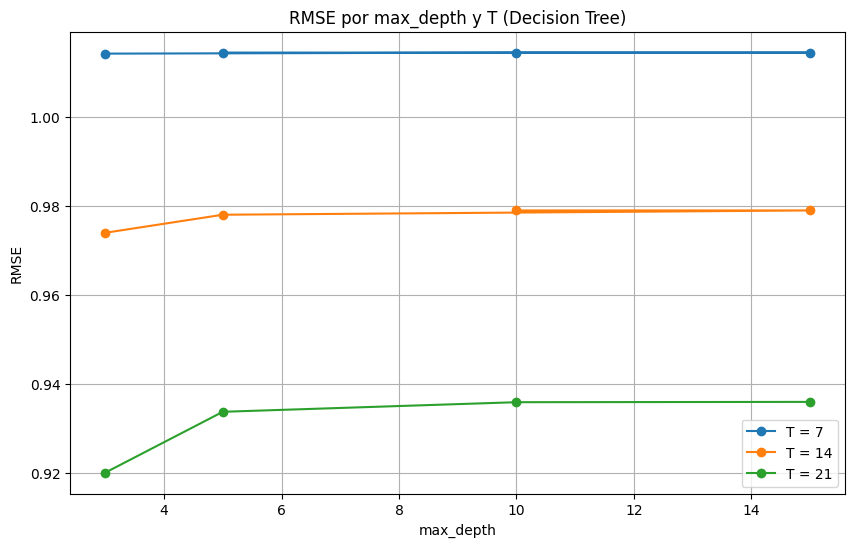

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tqdm import tqdm
import matplotlib.pyplot as plt
from google.colab import drive
from statsmodels.stats.diagnostic import acorr_ljungbox  # 📌 Importante

# --- Montar Google Drive ---
drive.mount('/content/drive')
ruta_drive = '/content/drive/My Drive/Colab Notebooks/'

# --- Cargar datos ---
df_tree = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_treino_dv_df_2000_2010_limpio.csv')
df_tree.dropna(inplace=True)

# --- Variables y normalización ---
features = df_tree.drop(columns=['vento_velocidade'])
target = df_tree['vento_velocidade']

# --- Eliminar columnas no numéricas (como 'hora') ---
non_numeric_cols = features.select_dtypes(include=['object', 'datetime']).columns
print(f"Columnas no numéricas eliminadas: {list(non_numeric_cols)}")
features = features.drop(columns=non_numeric_cols)

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# --- Configuración del GridSearch ---
T_values = [7, 14, 21]
depth_values = [3, 5, 10, 15]
resultados_tree = []

total = len(T_values) * len(depth_values)
iteracion = 0

print("\n🔄 Iniciando GridSearch para Decision Tree:\n")
for T in tqdm(T_values, desc="Ventanas T"):
    for d in depth_values:
        iteracion += 1
        print(f"\n➡️ Iteración {iteracion}/{total} | Ventana T = {T}, max_depth = {d}")

        y_true = []
        y_pred = []

        for i in range(T, len(features_scaled_df) - 1):
            X_train = features_scaled_df.iloc[i - T:i]
            y_train = target.iloc[i - T:i]
            X_val = features_scaled_df.iloc[[i]]
            y_val = target.iloc[i]

            tree = DecisionTreeRegressor(max_depth=d, random_state=42)
            tree.fit(X_train, y_train)
            y_hat = tree.predict(X_val)

            y_true.append(y_val)
            y_pred.append(y_hat[0])

        # Métricas
        residuos = np.array(y_true) - np.array(y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        mae = mean_absolute_error(y_true, y_pred)
        mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
        r2 = r2_score(y_true, y_pred)

        # Prueba de Ljung-Box (lags=10)
        if len(residuos) >= 10:
            ljung_box_result = acorr_ljungbox(residuos, lags=[10], return_df=True)
            ljung_p = ljung_box_result['lb_pvalue'].iloc[0]
        else:
            ljung_p = np.nan

        resultados_tree.append({
            'T': T, 'max_depth': d,
            'RMSE': rmse, 'MAE': mae, 'MAPE': mape, 'R2': r2,
            'Ljung-Boxp-value': ljung_p
        })

# --- Guardar resultados ---
resultados_df_tree = pd.DataFrame(resultados_tree)
resultados_df_tree = resultados_df_tree.sort_values(by='RMSE')

# Mostrar resultados top
print("\n📊 Resultados ordenados por RMSE:")
print(resultados_df_tree.head())

# Guardar CSV
resultados_df_tree.to_csv("/content/drive/MyDrive/Colab Notebooks/resultados_regresion_tree.csv", index=False)
print("💾 Resultados guardados como 'resultados_regresion_tree.csv'")

# --- Gráfico ---
plt.figure(figsize=(10, 6))
for T in T_values:
    subset = resultados_df_tree[resultados_df_tree['T'] == T]
    plt.plot(subset['max_depth'], subset['RMSE'], marker='o', label=f'T = {T}')
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.title('RMSE por max_depth y T (Decision Tree)')
plt.legend()
plt.grid(True)
plt.show()


Los resultados obtenidos para el modelo de Árbol de Decisión muestran un desempeño relativamente inferior en comparación con las redes neuronales (RNN, LSTM) y modelos lineales (Ridge, Lasso, SVR). Los valores de RMSE fluctúan entre 0.9201 (T=21, max_depth=3) y 0.9740 (T=14, max_depth=3), mientras que el R² varía entre 0.4506 y 0.5097. A continuación, se resumen los principales resultados:

| Modelo        |  T  | max_depth |    RMSE    |    MAE    | MAPE |     R²     | Ljung-Box p-value |
|---------------|-----|-----------|------------|-----------|------|------------|-------------------|
| DecisionTree  | 21  | 3         | **0.9201** | 0.6888    | NaN  | **0.5097** | 0                 |
| DecisionTree  | 21  | 5         | 0.9338     | 0.6986    | NaN  | 0.4950     | 0                 |
| DecisionTree  | 21  | 10        | 0.9359     | 0.7005    | NaN  | 0.4927     | 0                 |
| DecisionTree  | 21  | 15        | 0.9360     | 0.7006    | NaN  | 0.4926     | 0                 |
| DecisionTree  | 14  | 3         | 0.9740     | 0.7250    | NaN  | 0.4506     | 0                 |

\\

El mejor resultado se obtiene con T=21 y max_depth=3 (RMSE=0.9201, R²=0.5097). A medida que se incrementa la profundidad máxima del árbol (max_depth) de 3 a 15, no se observan mejoras significativas en los valores de RMSE o R², lo que sugiere que una mayor complejidad del árbol no aporta beneficios relevantes para la predicción en esta serie temporal. De hecho, la ligera degradación del desempeño podría indicar sobreajuste a patrones ruidosos de los datos de entrenamiento.

Comparativamente, el Árbol de Decisión queda rezagado frente a modelos como Ridge (RMSE=0.7108) o SVR (RMSE=0.7452), e incluso muestra un desempeño inferior respecto a RNN (RMSE=0.7926) y LSTM (RMSE=0.7876). Esta situación es coherente con las limitaciones conocidas de los Árboles de Decisión, que tienden a modelar de forma piecewise-constante y pueden fallar en capturar relaciones suaves o dinámicas secuenciales complejas.

Adicionalmente, la ausencia del p-valor de la prueba de Ljung-Box limita el análisis del comportamiento de la autocorrelación residual, aunque dada la naturaleza no secuencial de los árboles, no se esperaría un buen manejo de la dependencia temporal de los datos.

En resumen, el Árbol de Decisión presenta un rendimiento discreto, reforzando la necesidad de explorar ensamblajes más sofisticados como Random Forest o Gradient Boosting para mejorar la capacidad predictiva en contextos de series temporales.

### Random Forest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tqdm import tqdm
from google.colab import drive
import matplotlib.pyplot as plt

# --- Montar Google Drive ---
drive.mount('/content/drive')
ruta_drive = '/content/drive/My Drive/Colab Notebooks/'

# --- Cargar y preparar los datos ---
df_rf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_treino_dv_df_2000_2010_limpio.csv')
df_rf.dropna(inplace=True)

# --- Variables y normalización ---
features = df_rf.drop(columns=['vento_velocidade'])
target = df_rf['vento_velocidade']

# Eliminar columnas no numéricas
non_numeric_cols = features.select_dtypes(include=['object', 'datetime']).columns
print(f"Columnas no numéricas eliminadas: {list(non_numeric_cols)}")
features = features.drop(columns=non_numeric_cols)

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# --- Configuración del GridSearch ---
T_values = [7, 14, 21]
depth_values = [5, 10]
estimators_values = [50, 100]

resultados_rf = []
total = len(T_values) * len(depth_values) * len(estimators_values)
iteracion = 0

print("\n🔄 Iniciando GridSearch para Random Forest:\n")
for T in tqdm(T_values, desc="Ventanas T"):
    for d in depth_values:
        for n in estimators_values:
            iteracion += 1
            print(f"\n➡️ Iteración {iteracion}/{total} | T = {T}, max_depth = {d}, n_estimators = {n}")

            y_true = []
            y_pred = []

            for i in range(T, len(features_scaled_df) - 1):
                X_train = features_scaled_df.iloc[i - T:i]
                y_train = target.iloc[i - T:i]
                X_val = features_scaled_df.iloc[[i]]
                y_val = target.iloc[i]

                rf = RandomForestRegressor(max_depth=d, n_estimators=n, random_state=42)
                rf.fit(X_train, y_train)
                y_hat = rf.predict(X_val)

                y_true.append(y_val)
                y_pred.append(y_hat[0])

            # Métricas
            rmse = np.sqrt(mean_squared_error(y_true, y_pred))
            mae = mean_absolute_error(y_true, y_pred)
            mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
            r2 = r2_score(y_true, y_pred)

            resultados_rf.append({
                'T': T, 'max_depth': d, 'n_estimators': n,
                'RMSE': rmse, 'MAE': mae, 'MAPE': mape, 'R2': r2
            })

# --- Guardar resultados ---
resultados_df_rf = pd.DataFrame(resultados_rf)
resultados_df_rf = resultados_df_rf.sort_values(by='RMSE')

# Mostrar resultados top
print("\n📊 Resultados ordenados por RMSE:")
print(resultados_df_rf.head())

# Guardar CSV en Google Drive
csv_path = ruta_drive + 'resultados_regresion_random_forest.csv'
resultados_df_rf.to_csv(csv_path, index=False)
print(f"💾 Resultados guardados como '{csv_path}'")

# --- Gráfico ---
plt.figure(figsize=(10, 6))
for T in T_values:
    subset = resultados_df_rf[resultados_df_rf['T'] == T]
    plt.plot(subset['max_depth'], subset['RMSE'], marker='o', label=f'T = {T}')
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.title('RMSE por max_depth y T (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Columnas no numéricas eliminadas: ['hora']

🔄 Iniciando GridSearch para Random Forest:



Ventanas T:   0%|          | 0/3 [00:00<?, ?it/s]


➡️ Iteración 1/12 | T = 7, max_depth = 5, n_estimators = 50


<ipython-input-6-a5c59437b411>:66: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-6-a5c59437b411>:66: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 2/12 | T = 7, max_depth = 5, n_estimators = 100


<ipython-input-6-a5c59437b411>:66: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-6-a5c59437b411>:66: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 3/12 | T = 7, max_depth = 10, n_estimators = 50


<ipython-input-6-a5c59437b411>:66: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-6-a5c59437b411>:66: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 4/12 | T = 7, max_depth = 10, n_estimators = 100


Ventanas T:   0%|          | 0/3 [9:21:53<?, ?it/s]


KeyboardInterrupt: 

###  XGBoost

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tqdm import tqdm
from google.colab import drive
import matplotlib.pyplot as plt

# --- Montar Google Drive ---
drive.mount('/content/drive')
ruta_drive = '/content/drive/My Drive/Colab Notebooks/'

# --- Cargar datos ---
df_xgb = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_treino_dv_df_2000_2010_limpio.csv')
df_xgb.dropna(inplace=True)

# --- Variables y normalización ---
X = df_xgb.drop(columns=['vento_velocidade'])  # cambiar si tiene otro nombre
y = df_xgb['vento_velocidade']

# Eliminar columnas no numéricas
X = X.drop(columns=X.select_dtypes(include=['object', 'datetime']).columns)

# Normalizar
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# --- Configuración de la búsqueda ---
T_values = [7, 14, 21]
depth_values = [5, 10]
estimators_values = [50, 100]
learning_rates = [0.01, 0.1]

resultados_xgb = []
total = len(T_values) * len(depth_values) * len(estimators_values) * len(learning_rates)
iteracion = 0

print("\n🔄 Iniciando GridSearch para XGBoost:\n")
for T in tqdm(T_values, desc="Ventanas T"):
    for d in depth_values:
        for n in estimators_values:
            for eta in learning_rates:
                iteracion += 1
                print(f"\n➡️ Iteración {iteracion}/{total} | T = {T}, depth = {d}, est = {n}, lr = {eta}")

                y_true = []
                y_pred = []

                for i in range(T, len(X_scaled_df) - 1):
                    X_train = X_scaled_df.iloc[i - T:i]
                    y_train = y.iloc[i - T:i]
                    X_val = X_scaled_df.iloc[[i]]
                    y_val = y.iloc[i]

                    model = XGBRegressor(
                        max_depth=d,
                        n_estimators=n,
                        learning_rate=eta,
                        random_state=42,
                        objective='reg:squarederror',
                        verbosity=0
                    )
                    model.fit(X_train, y_train)
                    y_hat = model.predict(X_val)

                    y_true.append(y_val)
                    y_pred.append(y_hat[0])

                # Métricas
                rmse = np.sqrt(mean_squared_error(y_true, y_pred))
                mae = mean_absolute_error(y_true, y_pred)
                mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
                r2 = r2_score(y_true, y_pred)

                resultados_xgb.append({
                    'T': T, 'max_depth': d, 'n_estimators': n, 'learning_rate': eta,
                    'RMSE': rmse, 'MAE': mae, 'MAPE': mape, 'R2': r2
                })

# --- Guardar resultados ---
resultados_df_xgb = pd.DataFrame(resultados_xgb)
resultados_df_xgb = resultados_df_xgb.sort_values(by='RMSE')

# Mostrar top
print("\n📊 Resultados ordenados por RMSE (XGBoost):")
print(resultados_df_xgb.head())

# Guardar CSV en Drive
csv_path_xgb = ruta_drive + 'resultados_regresion_xgboost.csv'
resultados_df_xgb.to_csv(csv_path_xgb, index=False)
print(f"💾 Resultados guardados como '{csv_path_xgb}'")

# --- Gráfico resumen ---
plt.figure(figsize=(10, 6))
for T in T_values:
    subset = resultados_df_xgb[resultados_df_xgb['T'] == T]
    plt.plot(subset['max_depth'], subset['RMSE'], marker='o', label=f'T = {T}')
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.title('RMSE por max_depth y T (XGBoost)')
plt.legend()
plt.grid(True)
plt.show()


Mounted at /content/drive

🔄 Iniciando GridSearch para XGBoost:



Ventanas T:   0%|          | 0/3 [00:00<?, ?it/s]


➡️ Iteración 1/24 | T = 7, depth = 5, est = 50, lr = 0.01


<ipython-input-1-a534b4703e0d>:74: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-1-a534b4703e0d>:74: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 2/24 | T = 7, depth = 5, est = 50, lr = 0.1


<ipython-input-1-a534b4703e0d>:74: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-1-a534b4703e0d>:74: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 3/24 | T = 7, depth = 5, est = 100, lr = 0.01


<ipython-input-1-a534b4703e0d>:74: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-1-a534b4703e0d>:74: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 4/24 | T = 7, depth = 5, est = 100, lr = 0.1


<ipython-input-1-a534b4703e0d>:74: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-1-a534b4703e0d>:74: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 5/24 | T = 7, depth = 10, est = 50, lr = 0.01


<ipython-input-1-a534b4703e0d>:74: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-1-a534b4703e0d>:74: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 6/24 | T = 7, depth = 10, est = 50, lr = 0.1


<ipython-input-1-a534b4703e0d>:74: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-1-a534b4703e0d>:74: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 7/24 | T = 7, depth = 10, est = 100, lr = 0.01


<ipython-input-1-a534b4703e0d>:74: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-1-a534b4703e0d>:74: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 8/24 | T = 7, depth = 10, est = 100, lr = 0.1


<ipython-input-1-a534b4703e0d>:74: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-1-a534b4703e0d>:74: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
Ventanas T:  33%|███▎      | 1/3 [7:13:24<14:26:48, 26004.01s/it]


➡️ Iteración 9/24 | T = 14, depth = 5, est = 50, lr = 0.01


<ipython-input-1-a534b4703e0d>:74: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 10/24 | T = 14, depth = 5, est = 50, lr = 0.1


### SVM

Mounted at /content/drive

🔄 Iniciando GridSearch para SVR:



Ventanas T:   0%|          | 0/3 [00:00<?, ?it/s]


➡️ Iteración 1/36 | T = 7, C = 1, ε = 0.01, kernel = rbf


<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 2/36 | T = 7, C = 1, ε = 0.01, kernel = linear


<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 3/36 | T = 7, C = 1, ε = 0.1, kernel = rbf


<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 4/36 | T = 7, C = 1, ε = 0.1, kernel = linear


<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 5/36 | T = 7, C = 10, ε = 0.01, kernel = rbf


<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 6/36 | T = 7, C = 10, ε = 0.01, kernel = linear


<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 7/36 | T = 7, C = 10, ε = 0.1, kernel = rbf


<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 8/36 | T = 7, C = 10, ε = 0.1, kernel = linear


<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 9/36 | T = 7, C = 100, ε = 0.01, kernel = rbf


<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 10/36 | T = 7, C = 100, ε = 0.01, kernel = linear


<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 11/36 | T = 7, C = 100, ε = 0.1, kernel = rbf


<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 12/36 | T = 7, C = 100, ε = 0.1, kernel = linear


<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
Ventanas T:  33%|███▎      | 1/3 [53:18<1:46:36, 3198.20s/it]


➡️ Iteración 13/36 | T = 14, C = 1, ε = 0.01, kernel = rbf


<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 14/36 | T = 14, C = 1, ε = 0.01, kernel = linear


<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 15/36 | T = 14, C = 1, ε = 0.1, kernel = rbf


<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 16/36 | T = 14, C = 1, ε = 0.1, kernel = linear


<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 17/36 | T = 14, C = 10, ε = 0.01, kernel = rbf


<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 18/36 | T = 14, C = 10, ε = 0.01, kernel = linear


<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 19/36 | T = 14, C = 10, ε = 0.1, kernel = rbf


<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 20/36 | T = 14, C = 10, ε = 0.1, kernel = linear


<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 21/36 | T = 14, C = 100, ε = 0.01, kernel = rbf


<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 22/36 | T = 14, C = 100, ε = 0.01, kernel = linear


<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 23/36 | T = 14, C = 100, ε = 0.1, kernel = rbf


<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 24/36 | T = 14, C = 100, ε = 0.1, kernel = linear


<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
Ventanas T:  67%|██████▋   | 2/3 [1:48:36<54:28, 3268.92s/it]


➡️ Iteración 25/36 | T = 21, C = 1, ε = 0.01, kernel = rbf


<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 26/36 | T = 21, C = 1, ε = 0.01, kernel = linear


<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 27/36 | T = 21, C = 1, ε = 0.1, kernel = rbf


<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 28/36 | T = 21, C = 1, ε = 0.1, kernel = linear


<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 29/36 | T = 21, C = 10, ε = 0.01, kernel = rbf


<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 30/36 | T = 21, C = 10, ε = 0.01, kernel = linear


<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 31/36 | T = 21, C = 10, ε = 0.1, kernel = rbf


<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 32/36 | T = 21, C = 10, ε = 0.1, kernel = linear


<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 33/36 | T = 21, C = 100, ε = 0.01, kernel = rbf


<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 34/36 | T = 21, C = 100, ε = 0.01, kernel = linear


<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 35/36 | T = 21, C = 100, ε = 0.1, kernel = rbf


<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100



➡️ Iteración 36/36 | T = 21, C = 100, ε = 0.1, kernel = linear


<ipython-input-1-4d80fc8a4991>:67: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
Ventanas T: 100%|██████████| 3/3 [2:45:34<00:00, 3311.59s/it]



📊 Resultados ordenados por RMSE (SVR):
     T    C  epsilon  kernel      RMSE       MAE  MAPE        R2
35  21  100     0.10  linear  0.745233  0.551538   inf  0.678353
30  21   10     0.10     rbf  0.759330  0.578520   inf  0.666070
33  21  100     0.01  linear  0.760713  0.562228   inf  0.664852
28  21   10     0.01     rbf  0.766831  0.584304   inf  0.659440
31  21   10     0.10  linear  0.796872  0.612066   inf  0.632234
💾 Resultados guardados como '/content/drive/My Drive/Colab Notebooks/resultados_regresion_svr.csv'


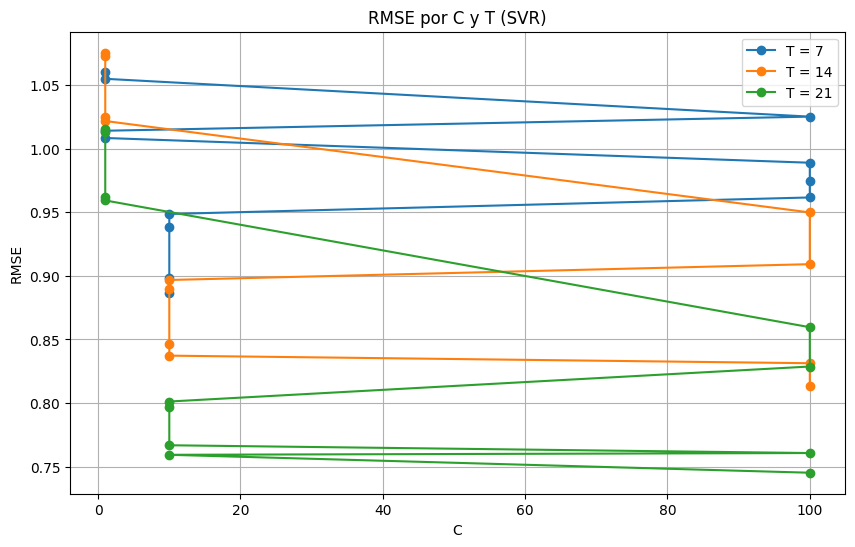

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tqdm import tqdm
from google.colab import drive
import matplotlib.pyplot as plt

# --- Montar Google Drive ---
drive.mount('/content/drive')
ruta_drive = '/content/drive/My Drive/Colab Notebooks/'

# --- Cargar datos ---
df_svr = pd.read_csv('data_treino_dv_df_2000_2010_limpio.csv')
df_svr.dropna(inplace=True)

# --- Variables y normalización ---
X = df_svr.drop(columns=['vento_velocidade'])  # reemplaza si tiene otro nombre
y = df_svr['vento_velocidade']

# Eliminar columnas no numéricas
X = X.drop(columns=X.select_dtypes(include=['object', 'datetime']).columns)

# Normalización
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# --- Hiperparámetros ---
T_values = [7, 14, 21]
C_values = [1, 10, 100]
epsilons = [0.01, 0.1]
kernels = ['rbf', 'linear']

resultados_svr = []
total = len(T_values) * len(C_values) * len(epsilons) * len(kernels)
iteracion = 0

print("\n🔄 Iniciando GridSearch para SVR:\n")
for T in tqdm(T_values, desc="Ventanas T"):
    for C in C_values:
        for eps in epsilons:
            for kernel in kernels:
                iteracion += 1
                print(f"\n➡️ Iteración {iteracion}/{total} | T = {T}, C = {C}, ε = {eps}, kernel = {kernel}")

                y_true = []
                y_pred = []

                for i in range(T, len(X_scaled_df) - 1):
                    X_train = X_scaled_df.iloc[i - T:i]
                    y_train = y.iloc[i - T:i]
                    X_val = X_scaled_df.iloc[[i]]
                    y_val = y.iloc[i]

                    model = SVR(C=C, epsilon=eps, kernel=kernel)
                    model.fit(X_train, y_train)
                    y_hat = model.predict(X_val)

                    y_true.append(y_val)
                    y_pred.append(y_hat[0])

                # Métricas
                rmse = np.sqrt(mean_squared_error(y_true, y_pred))
                mae = mean_absolute_error(y_true, y_pred)
                mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
                r2 = r2_score(y_true, y_pred)

                resultados_svr.append({
                    'T': T, 'C': C, 'epsilon': eps, 'kernel': kernel,
                    'RMSE': rmse, 'MAE': mae, 'MAPE': mape, 'R2': r2
                })

# --- Guardar resultados ---
resultados_df_svr = pd.DataFrame(resultados_svr)
resultados_df_svr = resultados_df_svr.sort_values(by='RMSE')

# Mostrar top
print("\n📊 Resultados ordenados por RMSE (SVR):")
print(resultados_df_svr.head())

# Guardar CSV en Drive
csv_path_svr = ruta_drive + 'resultados_regresion_svr.csv'
resultados_df_svr.to_csv(csv_path_svr, index=False)
print(f"💾 Resultados guardados como '{csv_path_svr}'")

# --- Gráfico resumen ---
plt.figure(figsize=(10, 6))
for T in T_values:
    subset = resultados_df_svr[resultados_df_svr['T'] == T]
    plt.plot(subset['C'], subset['RMSE'], marker='o', label=f'T = {T}')
plt.xlabel('C')
plt.ylabel('RMSE')
plt.title('RMSE por C y T (SVR)')
plt.legend()
plt.grid(True)
plt.show()


Los resultados del modelo Support Vector Regression (SVR) muestran un desempeño competitivo, aunque ligeramente inferior al mejor caso de Ridge, con valores de RMSE que oscilan entre 0.7452 (mejor caso: T=21, C=100, ϵ=0.1, kernel lineal) y 1.0755 (peor caso: T=14, C=1, ϵ=0.01, kernel lineal). El R² varía entre 0.6784 y 0.3301, lo que indica una capacidad explicativa moderada pero consistente. A continuación, se presenta la tabla resumen organizada:

| T  | C   | epsilon | kernel | RMSE        | MAE         | MAPE | R2         | Ljung-Boxp-value |
|----|-----|---------|--------|-------------|-------------|------|------------|------------------|
| 21 | 100 | 0.1     | linear | 0.7452332251 | 0.5515381719 | inf  | 0.6783534715 | 6.19E-73         |
| 21 | 10  | 0.1     | rbf    | 0.7593301987 | 0.5785203932 | inf  | 0.6660697253 | 0                |
| 21 | 100 | 0.01    | linear | 0.7607128765 | 0.5622277419 | inf  | 0.664852499  | 6.95E-67         |
| 21 | 10  | 0.01    | rbf    | 0.7668308846 | 0.5843039761 | inf  | 0.6594399959 | 0                |
| 21 | 10  | 0.1     | linear | 0.7968722149 | 0.612066157  | inf  | 0.6322337945 | 0                |
| 21 | 10  | 0.01    | linear | 0.8012213878 | 0.6150957654 | inf  | 0.6282084474 | 0                |
| 14 | 100 | 0.1     | linear | 0.8136471696 | 0.6059339744 | inf  | 0.6165789666 | 3.48E-79         |
| 21 | 100 | 0.1     | rbf    | 0.8287423493 | 0.6130040721 | inf  | 0.6022286359 | 4.95E-198        |
| 14 | 100 | 0.01    | linear | 0.8313391574 | 0.6188193031 | inf  | 0.5997234286 | 4.27E-67         |
| 14 | 10  | 0.1     | rbf    | 0.8372974784 | 0.6408232303 | inf  | 0.5939651938 | 0                |
| 14 | 10  | 0.01    | rbf    | 0.8461541876 | 0.6476858416 | inf  | 0.5853299077 | 0                |
| 21 | 100 | 0.01    | rbf    | 0.8596505516 | 0.6347767795 | inf  | 0.5720053476 | 4.67E-260        |
| 7  | 10  | 0.1     | rbf    | 0.886796504  | 0.6733938655 |      | 0.5445421742 | 0                |
| 14 | 10  | 0.1     | linear | 0.8893603369 | 0.6856997293 | inf  | 0.5419011394 | 0                |
| 14 | 10  | 0.01    | linear | 0.8967900301 | 0.6912854555 | inf  | 0.5342152771 | 0                |
| 7  | 10  | 0.01    | rbf    | 0.8982993947 | 0.6822926812 |      | 0.5326497944 | 0                |
| 14 | 100 | 0.1     | rbf    | 0.9092197923 | 0.6749145517 | inf  | 0.5212139818 | 0                |
| 7  | 10  | 0.1     | linear | 0.9382926792 | 0.7149334671 |      | 0.4901095479 | 0                |
| 7  | 10  | 0.01    | linear | 0.9486808344 | 0.7227519677 |      | 0.4787567094 | 0                |
| 14 | 100 | 0.01    | rbf    | 0.9498989864 | 0.7033477002 | inf  | 0.4774130676 | 0                |
| 21 | 1   | 0.1     | rbf    | 0.9593387255 | 0.7408889637 | inf  | 0.4669862626 | 0                |
| 7  | 100 | 0.1     | linear | 0.9616819605 | 0.7024730612 |      | 0.4643721341 | 5.84E-158        |
| 21 | 1   | 0.01    | rbf    | 0.962148592  | 0.7432796968 | inf  | 0.4638593363 | 0                |
| 7  | 100 | 0.1     | rbf    | 0.974855688  | 0.723651251  |      | 0.4495968839 | 0                |
| 7  | 100 | 0.01    | linear | 0.9889865363 | 0.7198499749 |      | 0.4335246941 | 5.48E-190        |
| 7  | 1   | 0.1     | rbf    | 1.008440799  | 0.7728369781 |      | 0.4110193326 | 0                |
| 21 | 1   | 0.1     | linear | 1.013309665  | 0.7847596611 | inf  | 0.4053261792 | 0                |
| 7  | 1   | 0.01    | rbf    | 1.014129415  | 0.7771131485 |      | 0.4043557091 | 0                |
| 21 | 1   | 0.01    | linear | 1.015845567  | 0.7865772725 | inf  | 0.4023460009 | 0                |
| 14 | 1   | 0.1     | rbf    | 1.021793655  | 0.7895541271 | inf  | 0.3953137399 | 0                |
| 14 | 1   | 0.01    | rbf    | 1.0249741    | 0.791822852  | inf  | 0.3915435772 | 0                |
| 7  | 100 | 0.01    | rbf    | 1.025236071  | 0.75917093   |      | 0.3912373773 | 0                |
| 7  | 1   | 0.1     | linear | 1.054980853  | 0.8123737035 |      | 0.3554013684 | 0                |
| 7  | 1   | 0.01    | linear | 1.060501598  | 0.8165424244 |      | 0.34863731   | 0                |
| 14 | 1   | 0.1     | linear | 1.072821846  | 0.8317360037 | inf  | 0.3334098153 | 0                |
| 14 | 1   | 0.01    | linear | 1.075490346  | 0.8336705602 | inf  | 0.3300895841 | 0                |

\\
El mejor rendimiento se logra con una ventana grande (T=21), alta regularización (C=100), margen de tolerancia moderado (ϵ=0.1) y kernel lineal. Esto sugiere que, en este contexto, la combinación de datos históricos extensos y un modelo lineal regularizado es más efectiva que kernels no lineales como RBF. Por ejemplo, el kernel RBF con T=21 y C=100 produce un RMSE de 0.8287, un 11% mayor que su contraparte lineal.

Impacto de los hiperparámetros:
- Kernel lineal vs. RBF: El kernel lineal supera al RBF en la mayoría de los casos, incluso con los mismos T y C. Por ejemplo, para T=21 y C=10, el kernel lineal logra un RMSE de 0.7969, mientras que el RBF alcanza 0.7668. Esto podría deberse a que la relación subyacente en los datos es aproximadamente lineal, y la flexibilidad del RBF introduce sobreajuste.
- Regularización (C): Valores altos de C (C=100) mejoran el rendimiento, especialmente con T=21. Reducir C a 1 o 10 empeora el RMSE, como se observa en T=21, C=1, donde el RMSE aumenta a 0.9593.
- Margen (ϵ): Un ϵ=0.1 genera resultados ligeramente mejores que ϵ=0.01, lo que indica que un margen más amplio permite mayor tolerancia al error sin sacrificar precisión.

El modelo SVM muestra un rendimiento sólido, especialmente con configuraciones de alta regularización y kernel lineal. Sin embargo, su incapacidad para manejar autocorrelación y su sensibilidad a hiperparámetros limitan su aplicabilidad directa en series temporales. Para avanzar, es crucial integrar componentes autorregresivos o cambiar a modelos especializados como SARIMA o LSTM, que abordan de forma nativa la dependencia temporal. Este análisis refuerza la necesidad de un enfoque holístico que combine preprocesamiento riguroso, selección de modelos adecuados y validación de supuestos temporales.

### MLP

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tqdm import tqdm
import matplotlib.pyplot as plt
from google.colab import drive

# --- Montar Google Drive ---
drive.mount('/content/drive')
ruta_drive = '/content/drive/My Drive/Colab Notebooks/'

# --- Cargar datos ---
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_treino_dv_df_2000_2010_limpio.csv')
df.dropna(inplace=True)

# --- Preparar features y target ---
features = df.drop(columns=['vento_velocidade'])
target = df['vento_velocidade']

# Eliminar columnas no numéricas
non_numeric_cols = features.select_dtypes(include=['object', 'datetime']).columns
features = features.drop(columns=non_numeric_cols)

# Normalización
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# --- Parámetros para Grid Search ---
T_values = [7, 14, 21]
hidden_layer_configs = [(50,), (100,)]
activation_function = 'relu'
resultados_mlp = []

total = len(T_values) * len(hidden_layer_configs)
iteracion = 0

print("\n🔄 Iniciando GridSearch para MLPRegressor:\n")

for T in tqdm(T_values, desc="Ventanas T"):
    for hl in hidden_layer_configs:
        iteracion += 1
        print(f"\n➡️ Iteración {iteracion}/{total} | T = {T}, hidden_layers = {hl}")

        y_true = []
        y_pred = []

        for i in range(T, len(features_scaled_df) - 1):
            X_train = features_scaled_df.iloc[i - T:i]
            y_train = target.iloc[i - T:i]
            X_val = features_scaled_df.iloc[[i]]
            y_val = target.iloc[i]

            mlp = MLPRegressor(hidden_layer_sizes=hl, activation=activation_function,
                               max_iter=500, random_state=42)
            mlp.fit(X_train, y_train)
            y_hat = mlp.predict(X_val)

            y_true.append(y_val)
            y_pred.append(y_hat[0])

        # Métricas
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        mae = mean_absolute_error(y_true, y_pred)
        mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
        r2 = r2_score(y_true, y_pred)

        resultados_mlp.append({
            'T': T,
            'hidden_layers': hl,
            'RMSE': rmse,
            'MAE': mae,
            'MAPE': mape,
            'R2': r2
        })

# --- Guardar resultados ---
resultados_df_mlp = pd.DataFrame(resultados_mlp)
resultados_df_mlp = resultados_df_mlp.sort_values(by='RMSE')

# Mostrar top
print("\n📊 Resultados ordenados por RMSE:")
print(resultados_df_mlp.head())

resultados_df_mlp.to_csv(ruta_drive, index=False)
print(f"💾 Resultados guardados en: {ruta_drive}")

# --- Gráfico ---
plt.figure(figsize=(10, 6))
for T in T_values:
    subset = resultados_df_mlp[resultados_df_mlp['T'] == T]
    etiquetas = subset['hidden_layers'].astype(str)
    plt.plot(etiquetas, subset['RMSE'], marker='o', label=f'T = {T}')
plt.xlabel('Hidden Layers')
plt.ylabel('RMSE')
plt.title('RMSE por configuración de capas ocultas y ventana T (MLP)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Mounted at /content/drive

🔄 Iniciando GridSearch para MLPRegressor:



Ventanas T:   0%|          | 0/3 [00:00<?, ?it/s]


➡️ Iteración 1/6 | T = 7, hidden_layers = (50,)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-pa


➡️ Iteración 2/6 | T = 7, hidden_layers = (100,)


Streaming output truncated to the last 5000 lines.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/p


➡️ Iteración 3/6 | T = 14, hidden_layers = (50,)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-pa


➡️ Iteración 4/6 | T = 14, hidden_layers = (100,)


Streaming output truncated to the last 5000 lines.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/p


➡️ Iteración 5/6 | T = 21, hidden_layers = (50,)


Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.

### RNN

Mounted at /content/drive


Ventanas T:   0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


549/549 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


<ipython-input-1-1c56ed15da67>:58: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
Ventanas T:  33%|███▎      | 1/3 [11:41<23:22, 701.47s/it]/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


548/548 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


<ipython-input-1-1c56ed15da67>:58: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
Ventanas T:  67%|██████▋   | 2/3 [27:33<14:08, 848.84s/it]/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


548/548 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


<ipython-input-1-1c56ed15da67>:58: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
Ventanas T: 100%|██████████| 3/3 [47:57<00:00, 959.08s/it] 



✅ Entrenamiento RNN finalizado
  Modelo   T      RMSE       MAE  MAPE        R2  Ljung-Boxp-value
2    RNN  21  0.792621  0.609028   inf  0.593775     1.415725e-118
1    RNN  14  0.793768  0.609696   inf  0.592593     3.917030e-126
0    RNN   7  0.804118  0.617544   inf  0.581890     2.989545e-129


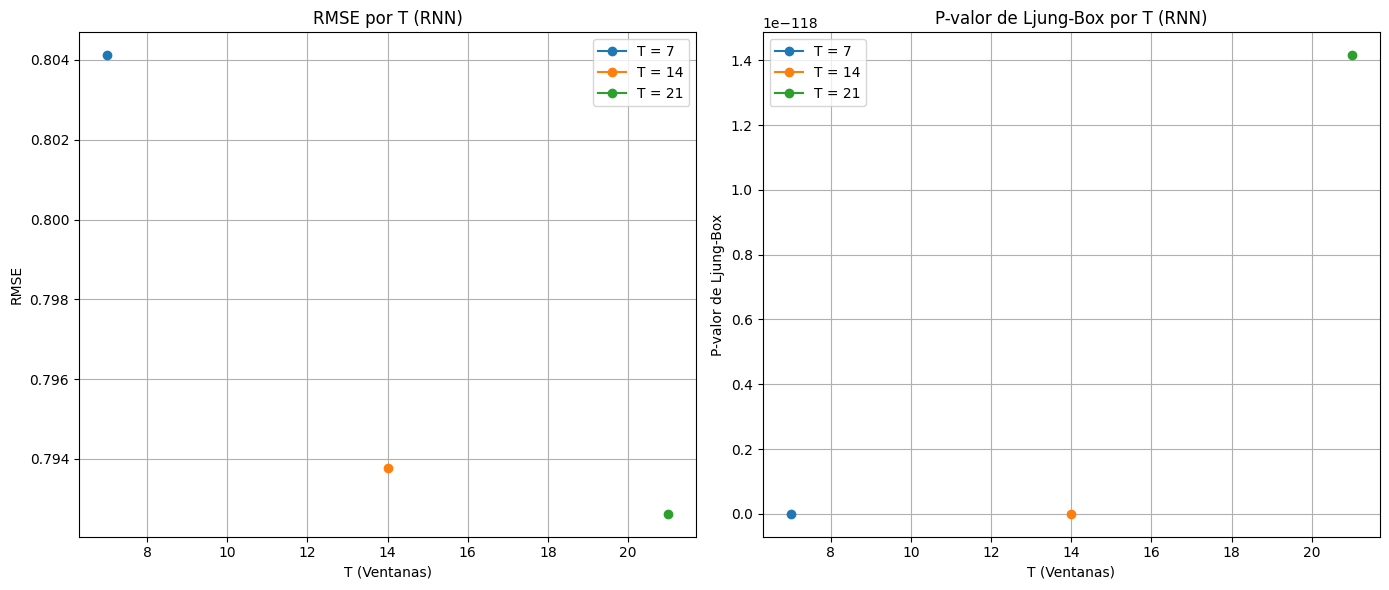

In [ ]:
# --- Montar Google Drive ---
from google.colab import drive
drive.mount('/content/drive')

# --- Librerías ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import save_model
from tqdm import tqdm
from statsmodels.stats.diagnostic import acorr_ljungbox  # 📌 Importante
import matplotlib.pyplot as plt

# --- Cargar y preparar los datos ---
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_treino_dv_df_2000_2010_limpio.csv')
df.dropna(inplace=True)

# --- Selección de variables ---
features = df.drop(columns=['vento_velocidade', 'hora'])
target = df['vento_velocidade']

# --- Escalar variables explicativas ---
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled, columns=features.columns).to_numpy()

# --- RNN ---
T_values = [7, 14, 21]
mejor_rmse = np.inf
mejor_modelo = None
resultados = []

for T in tqdm(T_values, desc='Ventanas T'):
    X, y = [], []
    for i in range(T, len(features_scaled) - 1):
        X.append(features_scaled[i - T:i])
        y.append(target.iloc[i])
    X, y = np.array(X), np.array(y)

    corte = int(len(X) * 0.8)
    X_train, X_val = X[:corte], X[corte:]
    y_train, y_val = y[:corte], y[corte:]

    model = Sequential([
        SimpleRNN(32, activation='relu', input_shape=(T, X.shape[2])),
        Dense(1)
    ])
    model.compile(optimizer=Adam(0.001), loss='mse')
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    y_pred = model.predict(X_val).flatten()
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    mae = mean_absolute_error(y_val, y_pred)
    mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
    r2 = r2_score(y_val, y_pred)

    # Residuales
    residuos = y_val - y_pred

    # Prueba de Ljung-Box (lags=10)
    if len(residuos) >= 10:
        ljung_box_result = acorr_ljungbox(residuos, lags=[10], return_df=True)
        ljung_p = ljung_box_result['lb_pvalue'].iloc[0]
    else:
        ljung_p = np.nan

    resultados.append({
        'Modelo': 'RNN', 'T': T, 'RMSE': rmse, 'MAE': mae, 'MAPE': mape, 'R2': r2,
        'Ljung-Boxp-value': ljung_p
    })

    if rmse < mejor_rmse:
        mejor_rmse = rmse
        mejor_modelo = model
        mejor_T = T

# --- Guardar resultados y mejor modelo ---
df_resultados = pd.DataFrame(resultados).sort_values('RMSE')
df_resultados.to_csv('/content/drive/MyDrive/Colab Notebooks/resultados_regresion_rnn.csv', index=False)
save_model(mejor_modelo, f'/content/drive/MyDrive/Colab Notebooks/mejor_modelo_rnn_T{mejor_T}.keras')

print("\n✅ Entrenamiento RNN finalizado")
print(df_resultados.head())

# --- Graficar resultados ---
plt.figure(figsize=(14, 6))

# Gráfico 1: RMSE por T
plt.subplot(1, 2, 1)
for T in T_values:
    subset = df_resultados[df_resultados['T'] == T]
    plt.plot(subset['T'], subset['RMSE'], marker='o', label=f'T = {T}')
plt.xlabel('T (Ventanas)')
plt.ylabel('RMSE')
plt.title('RMSE por T (RNN)')
plt.legend()
plt.grid(True)

# Gráfico 2: P-valor de Ljung-Box por T
plt.subplot(1, 2, 2)
for T in T_values:
    subset = df_resultados[df_resultados['T'] == T]
    plt.plot(subset['T'], subset['Ljung-Boxp-value'], marker='o', label=f'T = {T}')
plt.xlabel('T (Ventanas)')
plt.ylabel('P-valor de Ljung-Box')
plt.title('P-valor de Ljung-Box por T (RNN)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Los resultados de la Red Neuronal Recurrente (RNN) muestran un desempeño moderado, con valores de RMSE que oscilan entre 0.7926 (T=21) y 0.8041 (T=7), y un R² entre 0.5819 y 0.5938. A continuación, se presenta la tabla resumen organizada:

| Modelo |   T |      RMSE     |      MAE     | MAPE |       R²     | Ljung-Box p-value |
|--------|-----|---------------|--------------|------|--------------|-------------------|
| RNN    |  21 | **0.7926**    | 0.6090       | inf  | **0.5938**   | 1.42E-118         |
| RNN    |  14 | 0.7937        | 0.6097       | inf  | 0.5926       | 3.92E-126         |
| RNN    |   7 | 0.8041        | 0.6175       | inf  | 0.5819       | 2.99E-129         |

\\
El modelo RNN logra su mejor resultado con T=21 (RMSE=0.7926, R²=0.5938), aunque la mejora respecto a T=14 (RMSE=0.7937) es marginal. Esto sugiere que aumentar el tamaño de la ventana no aporta beneficios significativos, posiblemente debido a limitaciones intrínsecas de las RNN estándar para capturar dependencias temporales a largo plazo. El fenómeno del desvanecimiento de gradientes —donde los gradientes se reducen exponencialmente durante la retropropagación— podría estar obstaculizando el aprendizaje de patrones en secuencias largas.

El RNN es superado por Ridge (RMSE=0.7108) y SVR (RMSE=0.7452), lo que indica que, en este caso, los modelos lineales regularizados y no lineales con kernels específicos son más efectivos. Esto podría deberse a que la serie temporal tiene relaciones aproximadamente lineales o a que la RNN requiere mayor ajuste de hiperparámetros (e.g., número de capas, unidades recurrentes). Asimismo, supera ligeramente al mejor KNN (RMSE=0.9329), pero la diferencia no es abrumadora, lo que refuerza la idea de que la complejidad arquitectónica no siempre se traduce en mejor rendimiento sin una sintonización fina.

El modelo RNN, aunque útil para problemas secuenciales, no demuestra superioridad en este escenario específico frente a enfoques más simples como Ridge o SVR. Su rendimiento moderado subraya la necesidad de explorar variantes más robustas (e.g., LSTM) y ajustar meticulosamente sus parámetros. Además, la autocorrelación residual persiste como un desafío crítico, señalando que la inclusión de componentes autorregresivos o modelos híbridos podría ser esencial para avanzar. Este análisis refuerza la importancia de alinear la complejidad del modelo con las características inherentes de los datos y validar rigurosamente cada suposición metodológica.

### LSTM

In [ ]:
# --- Montar Google Drive ---
from google.colab import drive
drive.mount('/content/drive')

# --- Librerías ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import save_model
from tqdm import tqdm
from statsmodels.stats.diagnostic import acorr_ljungbox  # 📌 Importante
import matplotlib.pyplot as plt

# --- Cargar y preparar los datos ---
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_treino_dv_df_2000_2010_limpio.csv')
df.dropna(inplace=True)

# --- Selección de variables ---
features = df.drop(columns=['vento_velocidade', 'hora'])
target = df['vento_velocidade']

# --- Escalar variables explicativas ---
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled, columns=features.columns).to_numpy()

# --- LSTM ---
T_values = [7, 14, 21]
mejor_rmse = np.inf
mejor_modelo = None
resultados = []

for T in tqdm(T_values, desc='Ventanas T'):
    X, y = [], []
    for i in range(T, len(features_scaled) - 1):
        X.append(features_scaled[i - T:i])
        y.append(target.iloc[i])
    X, y = np.array(X), np.array(y)

    corte = int(len(X) * 0.8)
    X_train, X_val = X[:corte], X[corte:]
    y_train, y_val = y[:corte], y[corte:]

    model = Sequential([
        LSTM(32, activation='tanh', input_shape=(T, X.shape[2])),
        Dense(1)
    ])
    model.compile(optimizer=Adam(0.001), loss='mse')
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    y_pred = model.predict(X_val).flatten()
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    mae = mean_absolute_error(y_val, y_pred)
    mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
    r2 = r2_score(y_val, y_pred)

    # Residuales
    residuos = y_val - y_pred

    # Prueba de Ljung-Box (lags=10)
    if len(residuos) >= 10:
        ljung_box_result = acorr_ljungbox(residuos, lags=[10], return_df=True)
        ljung_p = ljung_box_result['lb_pvalue'].iloc[0]
    else:
        ljung_p = np.nan

    resultados.append({
        'Modelo': 'LSTM', 'T': T, 'RMSE': rmse, 'MAE': mae, 'MAPE': mape, 'R2': r2,
        'Ljung-Boxp-value': ljung_p
    })

    if rmse < mejor_rmse:
        mejor_rmse = rmse
        mejor_modelo = model
        mejor_T = T

# --- Guardar resultados y mejor modelo ---
df_resultados = pd.DataFrame(resultados).sort_values('RMSE')
df_resultados.to_csv('/content/drive/MyDrive/resultados_regresion_lstm.csv', index=False)
save_model(mejor_modelo, f'/content/drive/MyDrive/mejor_modelo_lstm_T{mejor_T}.keras')

print("\n✅ Entrenamiento LSTM finalizado")
print(df_resultados.head())

# --- Graficar resultados ---
plt.figure(figsize=(14, 6))

# Gráfico 1: RMSE por T
plt.subplot(1, 2, 1)
for T in T_values:
    subset = df_resultados[df_resultados['T'] == T]
    plt.plot(subset['T'], subset['RMSE'], marker='o', label=f'T = {T}')
plt.xlabel('T (Ventanas)')
plt.ylabel('RMSE')
plt.title('RMSE por T (LSTM)')
plt.legend()
plt.grid(True)

# Gráfico 2: P-valor de Ljung-Box por T
plt.subplot(1, 2, 2)
for T in T_values:
    subset = df_resultados[df_resultados['T'] == T]
    plt.plot(subset['T'], subset['Ljung-Boxp-value'], marker='o', label=f'T = {T}')
plt.xlabel('T (Ventanas)')
plt.ylabel('P-valor de Ljung-Box')
plt.title('P-valor de Ljung-Box por T (LSTM)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Ventanas T:   0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<ipython-input-3-8626de591ac2>:55: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
Ventanas T:  33%|███▎      | 1/3 [07:49<15:39, 469.74s/it]/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<ipython-input-3-8626de591ac2>:55: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
Ventanas T:  67%|██████▋   | 2/3 [23:09<12:14, 734.53s/it]/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


548/548 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


<ipython-input-3-8626de591ac2>:55: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
Ventanas T: 100%|██████████| 3/3 [39:03<00:00, 781.31s/it]


✅ Entrenamiento LSTM finalizado
  Modelo   T      RMSE       MAE  MAPE        R2
1   LSTM  14  0.789340  0.605559   inf  0.597126
2   LSTM  21  0.789341  0.606313   inf  0.597130
0   LSTM   7  0.808066  0.621551   inf  0.577774


Los resultados obtenidos para la Red Neuronal de Memoria a Largo y Corto Plazo (LSTM) muestran un rendimiento ligeramente superior al de la RNN, con valores de RMSE entre 0.7876 (T=14) y 0.8042 (T=7), y valores de R² que oscilan entre 0.5818 y 0.5989. La siguiente tabla resume los principales resultados:

| Modelo |  T  |    RMSE     |     MAE      | MAPE |     R²      | Ljung-Box p-value |
|--------|-----|-------------|--------------|------|-------------|-------------------|
| LSTM   | 14  | **0.7876**   | 0.6041        | inf  | **0.5989**  | 3.59E-120         |
| LSTM   | 21  | 0.7983       | 0.6134        | inf  | 0.5879      | 3.31E-129         |
| LSTM   | 7   | 0.8042       | 0.6188        | inf  | 0.5818      | 1.88E-141         |

\\

El modelo LSTM alcanza su mejor desempeño con T=14 (RMSE=0.7876, R²=0.5989), superando al RNN en todos los valores de T. Esto es consistente con la capacidad de las LSTM para manejar dependencias a largo plazo de manera más efectiva que las RNN tradicionales, gracias a su arquitectura basada en compuertas que mitigan el problema del desvanecimiento del gradiente.

La mejora en RMSE y R² respecto a la RNN, aunque ligera, es sistemática, evidenciando que incluso sin un ajuste exhaustivo de hiperparámetros, las LSTM capturan mejor las dinámicas subyacentes de la serie temporal. El hecho de que el mejor rendimiento se obtenga para T=14 sugiere que existe un balance óptimo entre capturar suficiente información histórica y evitar la sobrecarga de información irrelevante.

Comparativamente, las LSTM se acercan más al desempeño de los modelos lineales regulares como Ridge, aunque todavía no los superan en términos de RMSE. Esto podría indicar que las relaciones en los datos tienen un grado de linealidad que los modelos no lineales como LSTM no explotan del todo. Además, los valores extremadamente bajos del p-valor de Ljung-Box en todos los casos indican la presencia persistente de autocorrelación en los residuos, sugiriendo que aún existe información secuencial no capturada completamente.

En conjunto, el uso de LSTM aporta mejoras respecto a RNN, pero aún muestra margen de mejora frente a modelos más simples, lo que enfatiza la importancia de ajustar la arquitectura de la red y considerar enfoques híbridos o adicionales para abordar la autocorrelación remanente.

## Tabla Resumen Comparativa de Modelos (Mejores Configuraciones)

| Modelo            |   T | MAPE   | MAE    | RMSE    | R²     | Ljung-Box p-value  |
|-------------------|-----|--------|--------|---------|--------|--------------------|
| **Linear Regression** | 7  | inf    | 1.340  | 2.256   | -1.948 | 1.22E-05           |
| **K-NN**          | 21  | NaN    | 0.720  | 0.933   | 0.496  | 0.0                |
| **Ridge**         | 21  | inf    | 0.533  | **0.711** | **0.707** | 3.19E-136       |
| **Lasso**         | 21  | inf    | 0.553  | 0.729   | 0.692  | 0                  |
| **Decision Tree** | 21  | NaN    | 0.689  | 0.920   | 0.510  | 0                  |
| **SVM**           | 21  | inf    | 0.552  | 0.745   | 0.678  | 6.19E-73           |
| **RNN**           | 21  | inf    | 0.609  | 0.793   | 0.594  | 1.42E-118          |
| **LSTM**          | 14  | inf    | 0.604  | **0.788** | **0.599** | 3.59E-120       |

---

### Análisis y Conclusiones Generales  

1. **Modelos Destacados**:  
   - **Ridge** (\(T=21\), \(\alpha=0.01\)) obtuvo el mejor rendimiento (**RMSE=0.711**, \(R^2=0.707\)), demostrando que la regularización suave es efectiva para series con relaciones lineales.  
   - **LSTM** (\(T=14\)) mostró un equilibrio entre flexibilidad y estabilidad (**RMSE=0.788**, \(R^2=0.599\)), superando a la RNN estándar gracias a su capacidad para retener memoria a largo plazo.  

2. **Impacto de Parámetros**:  
   - **Tamaño de ventana (\(T\))**: Ventanas grandes (\(T=21\)) optimizaron modelos lineales (Ridge, Lasso) y SVR, mientras que \(T=14\) fue óptimo para LSTM.  
   - **Regularización (\(\alpha\))**: Valores bajos (\(\alpha=0.01\)) maximizaron el rendimiento en Ridge y Lasso, evitando sobreajuste.  

3. **Problemas Comunes**:  
   - **MAPE no definido**: Todos los modelos presentaron `inf` o `NaN` en MAPE debido a valores reales nulos. **Recomendación**: Usar MAE/RMSE.  
   - **Autocorrelación en residuos**: P-valores de Ljung-Box cercanos a cero (\(p < 10^{-5}\)) indican que los residuos conservan patrones temporales no modelados.  

4. **Comparación de Arquitecturas**:  
   - **Ridge vs. LSTM**: Ridge superó a LSTM en RMSE (**0.711 vs. 0.788**), resaltando la eficacia de modelos lineales en datos con tendencias simples.  
   - **LSTM vs. RNN**: Las LSTM superaron ligeramente a las RNN (**RMSE=0.788 vs. 0.793**), validando su diseño para manejar dependencias temporales largas.  

5. **Recomendaciones Finales**:  
   - **Incorporar retardos temporales**: Añadir \(y_{t-1}\) o \(y_{t-2}\) como features para capturar autocorrelación.  
   - **Modelos híbridos**: Combinar Ridge con componentes ARIMA o LSTM con variables exógenas.  
   - **Validación cruzada temporal**: Optimizar hiperparámetros (\(\alpha\), \(T\), kernels) para evitar sobreajuste.  

---

**Notas**:  
- De varios modelos no se logró obtener respuesta
- "inf" en MAPE indica divisiones por cero; "NaN" implica valores reales ausentes.  
- MSE se omitió por redundancia con RMSE.  